In [2]:
import pandas as pd

# Load the dataset to inspect the contents
file_path = 'Opportunity_Set.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


Date  Vanguard LifeStrategy Income Fund (VASIX)  \
0 2014-11-30                                     0.0094   
1 2014-12-31                                    -0.0005   
2 2015-01-31                                     0.0141   
3 2015-02-28                                     0.0033   
4 2015-03-31                                     0.0018   

   Vanguard Total World Stock ETF (VT)  \
0                               0.0126   
1                              -0.0199   
2                              -0.0163   
3                               0.0595   
4                              -0.0121   

   PIMCO 25+ Year Zero Coupon US Trs ETF (ZROZ)  \
0                                        0.0414   
1                                        0.0612   
2                                        0.1600   
3                                       -0.1007   
4                                        0.0117   

   AQR Diversified Arbitrage I (ADAIX)  iShares Gold Trust (IAU)  \
0                              -0.0066                   -0.0053   
1                              -0.0117                    0.0133   
2                              -0.0059                    0.0865   
3                               0.0069                   -0.0579   
4                               0.0000                   -0.0222   

   Bitcoin Market Price USD (^BTC)  \
0                           0.0969   
1                          -0.1777   
2                          -0.2677   
3                           0.1062   
4                          -0.0150   

   AQR Risk-Balanced Commodities Strategy I (ARCIX)  \
0                                           -0.0726   
1                                           -0.0412   
2                                           -0.0287   
3                                            0.0044   
4                                           -0.0573   

   AQR Long-Short Equity I (QLEIX)  AQR Style Premia Alternative I (QSPIX)  \
0                           0.0248                                  0.0412   
1                           0.0140                                  0.0002   
2                           0.0156                                 -0.0112   
3                           0.0236                                 -0.0390   
4                          -0.0027                                  0.0256   

   AQR Equity Market Neutral I (QMNIX)  AQR Macro Opportunities I (QGMIX)  \
0                               0.0257                             0.0154   
1                               0.0195                             0.0039   
2                               0.0290                            -0.0070   
3                              -0.0078                             0.0091   
4                               0.0049                             0.0261   

   AGF U.S. Market Neutral Anti-Beta (BTAL)  \
0                                    0.0235   
1                                    0.0294   
2                                    0.0320   
3                                   -0.0568   
4                                    0.0000   

   AQR Managed Futures Strategy HV I (QMHIX)  \
0                                     0.1159   
1                                     0.0461   
2                                     0.0721   
3                                    -0.0108   
4                                     0.0655   

   Invesco DB US Dollar Bullish (UUP)  ProShares VIX Mid-Term Futures (VIXM)  
0                              0.0165                                -0.0298  
1                              0.0213                                 0.0553  
2                              0.0484                                 0.0762  
3                              0.0028                                -0.1145  
4                              0.0278                                 0.0033

In [3]:
import pandas as pd

# Load the dataset to inspect the contents
file_path = 'Opportunity_Set.xlsx'
data = pd.read_excel(file_path)

# Drop the 'Date' column before running the summary statistics
numeric_data = data.drop(columns=['Date'])

# Calculate kurtosis and skew for each asset
kurtosis = numeric_data.kurtosis()
skewness = numeric_data.skew()

# Calculate the correlations of all assets with VASIX
correlation_with_vasix = numeric_data.corr()["Vanguard LifeStrategy Income Fund (VASIX)"]

# Generate summary statistics for all assets
summary_stats = numeric_data.describe().T  # Transpose for readability

# Rename columns for better clarity
summary_stats.columns = ['Count', 'Mean', 'Std Dev', 'Min', '25%', 'Median', '75%', 'Max']

# Add Kurtosis and Skewness
summary_stats['Skewness'] = skewness
summary_stats['Kurtosis'] = kurtosis

# Convert count to integer
summary_stats['Count'] = summary_stats['Count'].astype(int)

# Convert only percentage-relevant columns (mean, std dev, etc.) to percentage form
columns_to_convert = ['Mean', 'Std Dev', 'Min', '25%', 'Median', '75%', 'Max']
for col in columns_to_convert:
    summary_stats[col] = summary_stats[col] * 100  # Convert to percentage form

# Add the correlation with VASIX to the immediate right of the Count column
summary_stats.insert(1, 'Correlation with VASIX', correlation_with_vasix)

# Sort the summary stats by the correlation with VASIX
sorted_summary_stats = summary_stats.loc[correlation_with_vasix.sort_values(ascending=False).index]

# Adjust the color gradient to make it warmer and show 2 decimal places for skewness and kurtosis
styled_table = sorted_summary_stats.style \
    .format("{:.2f}", subset=pd.IndexSlice[:, columns_to_convert]) \
    .format("{:.0f}", subset=['Count']) \
    .format("{:.2f}", subset=['Correlation with VASIX', 'Skewness', 'Kurtosis']) \
    .set_caption("Summary Statistics of Asset Returns (in Percent Form, Including Skewness and Kurtosis, Sorted by Correlation with VASIX)") \
    .set_table_styles([
        {'selector': 'caption', 'props': 'caption-side: top; font-size: 14px; font-weight: bold; color: #6B6B6B;'},
        {'selector': 'thead th', 'props': [('background-color', '#f5f5f5'), ('color', 'black'), ('font-weight', 'bold')]}
    ]) \
    .background_gradient(cmap='Oranges', subset=['Correlation with VASIX'], axis=0, low=0.2, high=0.8)  # Warm color gradient for correlation

# Display the formatted table in Jupyter
styled_table


In [4]:
import pandas as pd
import dataframe_image as dfi

# Load the dataset to inspect the contents
file_path = 'Opportunity_Set.xlsx'
data = pd.read_excel(file_path)

# Drop the 'Date' column before running the summary statistics
numeric_data = data.drop(columns=['Date'])

# Calculate kurtosis and skew for each asset
kurtosis = numeric_data.kurtosis()
skewness = numeric_data.skew()

# Calculate the correlations of all assets with VASIX
correlation_with_vasix = numeric_data.corr()["Vanguard LifeStrategy Income Fund (VASIX)"]

# Generate summary statistics for all assets
summary_stats = numeric_data.describe().T  # Transpose for readability

# Rename columns for better clarity
summary_stats.columns = ['Count', 'Mean', 'Std Dev', 'Min', '25%', 'Median', '75%', 'Max']

# Add Kurtosis and Skewness
summary_stats['Skewness'] = skewness
summary_stats['Kurtosis'] = kurtosis

# Convert count to integer
summary_stats['Count'] = summary_stats['Count'].astype(int)

# Convert only percentage-relevant columns (mean, std dev, etc.) to percentage form
columns_to_convert = ['Mean', 'Std Dev', 'Min', '25%', 'Median', '75%', 'Max']
for col in columns_to_convert:
    summary_stats[col] = summary_stats[col] * 100  # Convert to percentage form

# Add the correlation with VASIX to the immediate right of the Count column
summary_stats.insert(1, 'Correlation with VASIX', correlation_with_vasix)

# Sort the summary stats by the correlation with VASIX
sorted_summary_stats = summary_stats.loc[correlation_with_vasix.sort_values(ascending=False).index]

# Adjust the color gradient to make it warmer and show 2 decimal places for skewness and kurtosis
styled_table = sorted_summary_stats.style \
    .format("{:.2f}", subset=pd.IndexSlice[:, columns_to_convert]) \
    .format("{:.0f}", subset=['Count']) \
    .format("{:.2f}", subset=['Correlation with VASIX', 'Skewness', 'Kurtosis']) \
    .set_caption("Summary Statistics of Asset Returns (in Percent Form, Including Skewness and Kurtosis, Sorted by Correlation with VASIX)") \
    .set_table_styles([
        {'selector': 'caption', 'props': 'caption-side: top; font-size: 14px; font-weight: bold; color: #6B6B6B;'},
        {'selector': 'thead th', 'props': [('background-color', '#f5f5f5'), ('color', 'black'), ('font-weight', 'bold')]}
    ]) \
    .background_gradient(cmap='Oranges', subset=['Correlation with VASIX'], axis=0, low=0.2, high=0.8)  # Warm color gradient for correlation

# Save the styled table as an image (PNG format)
dfi.export(styled_table, 'formatted_table.png')

# Optional: Display the formatted table in Jupyter
styled_table



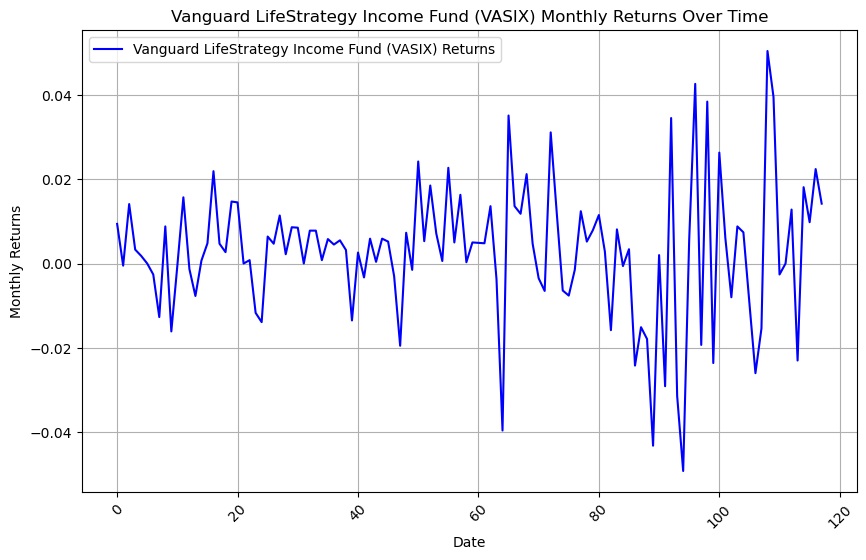

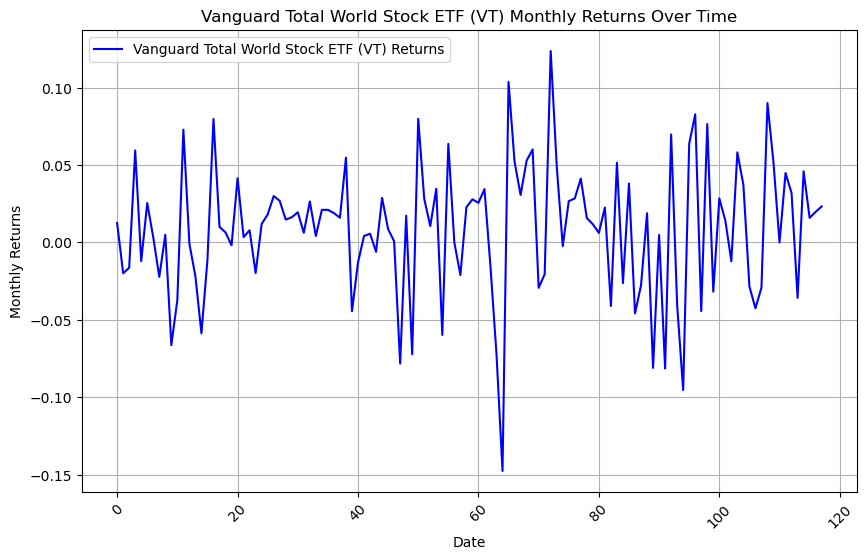

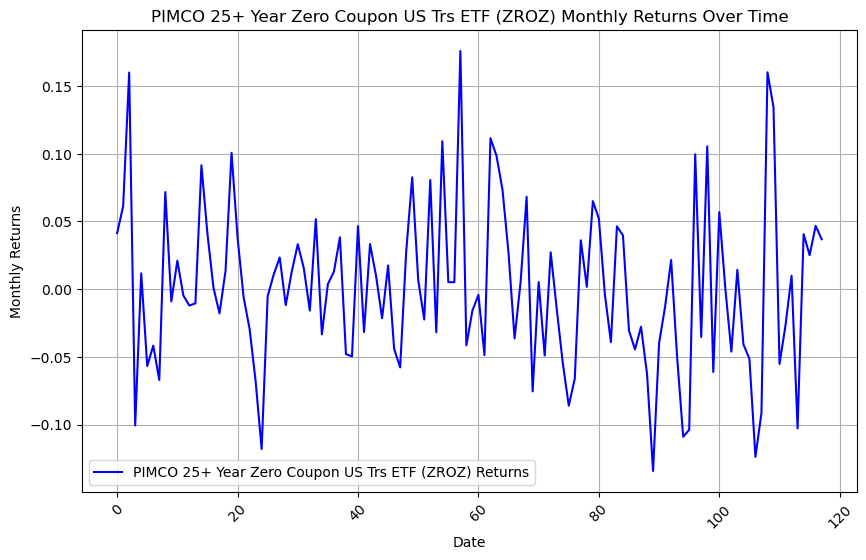

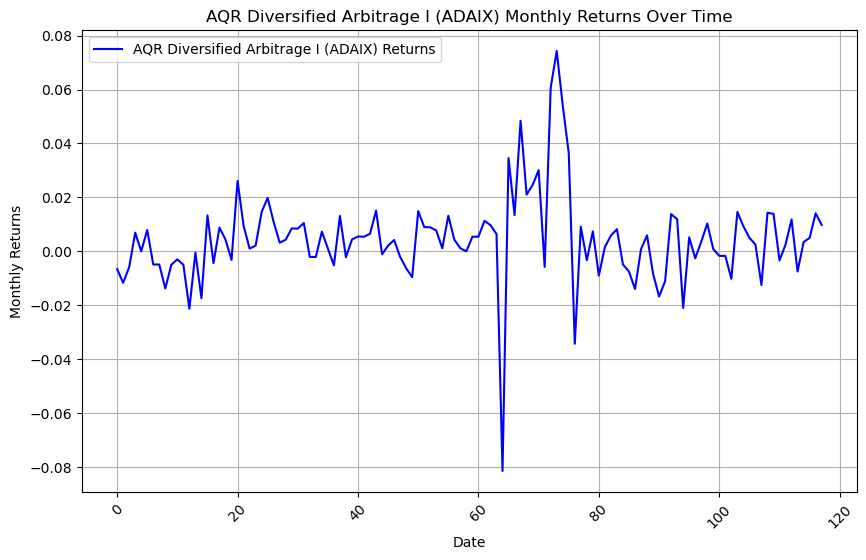

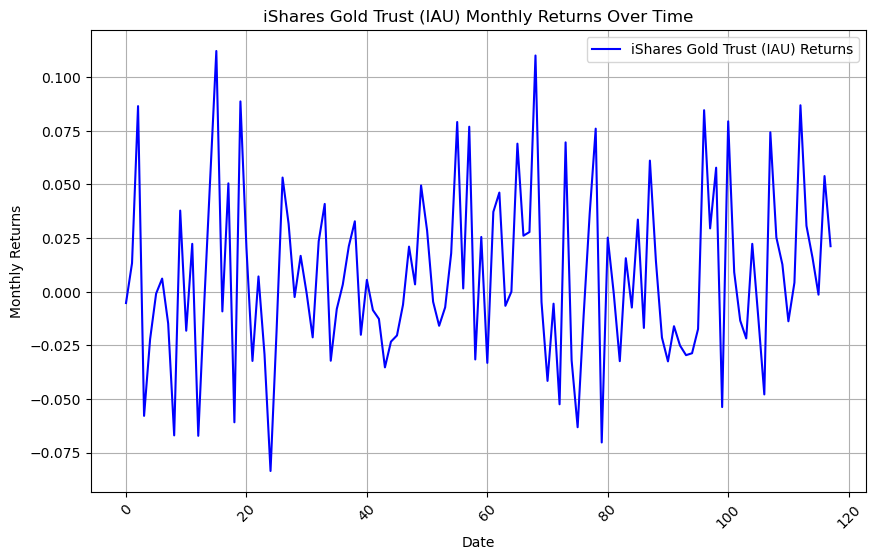

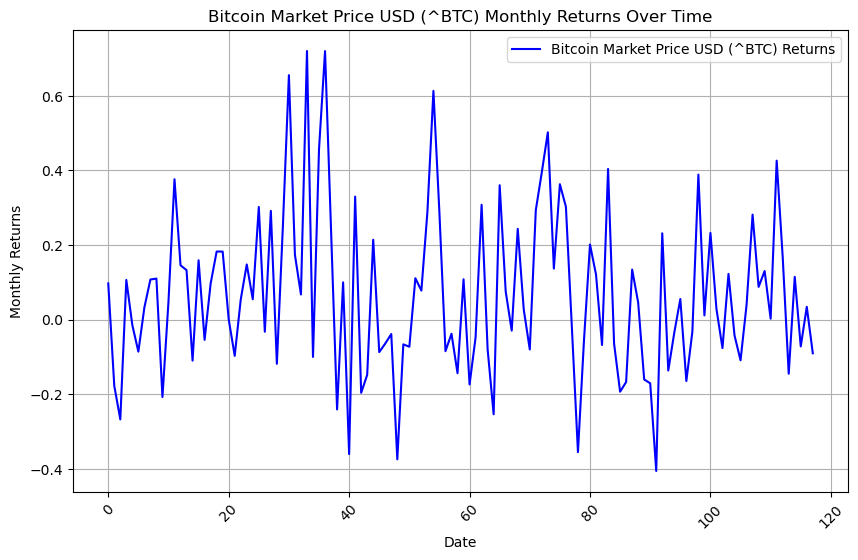

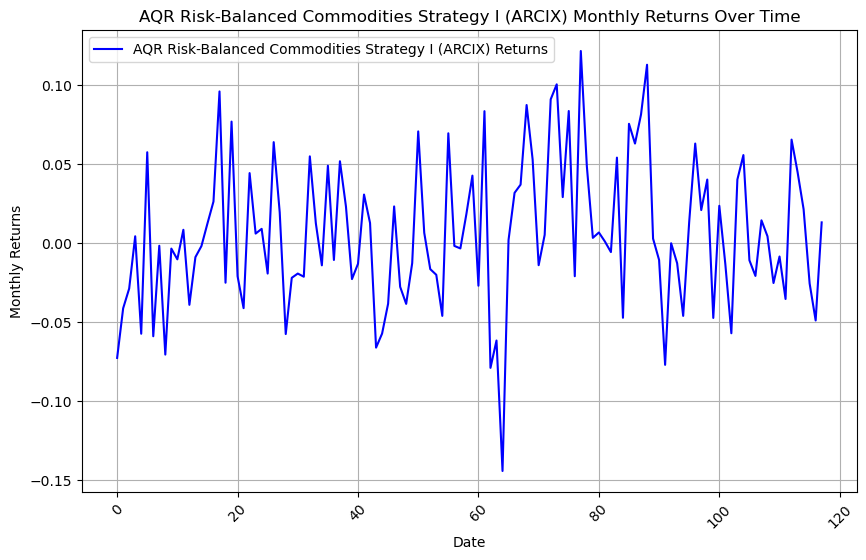

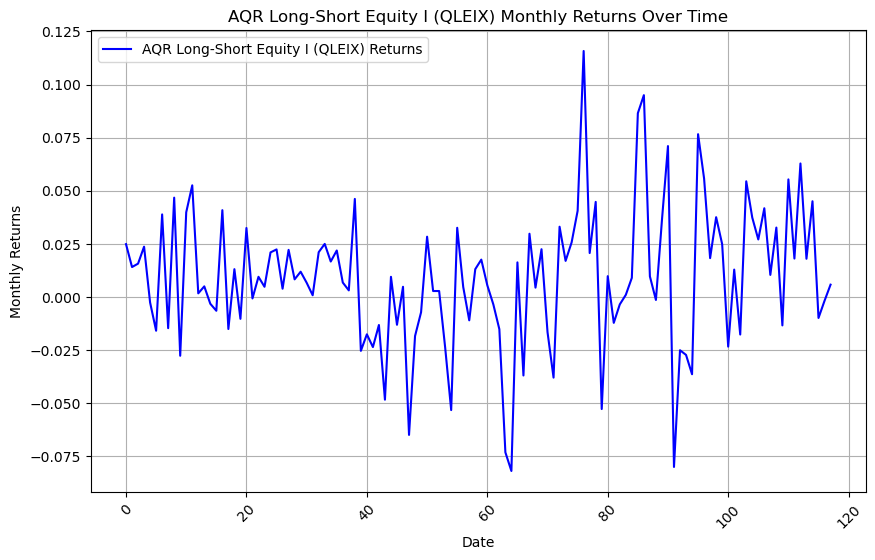

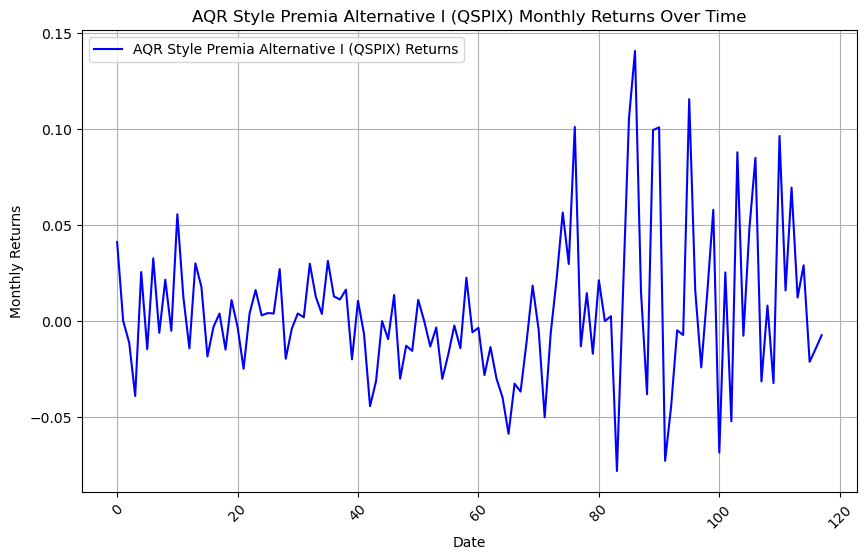

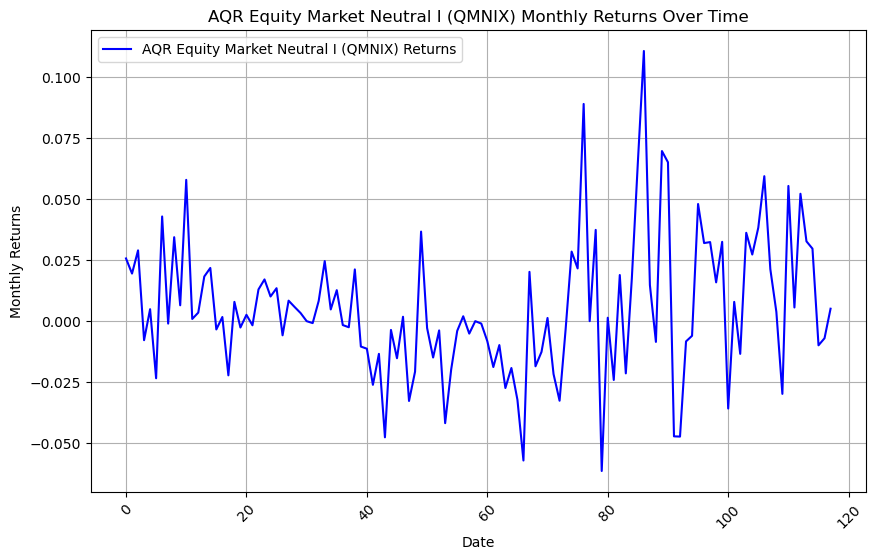

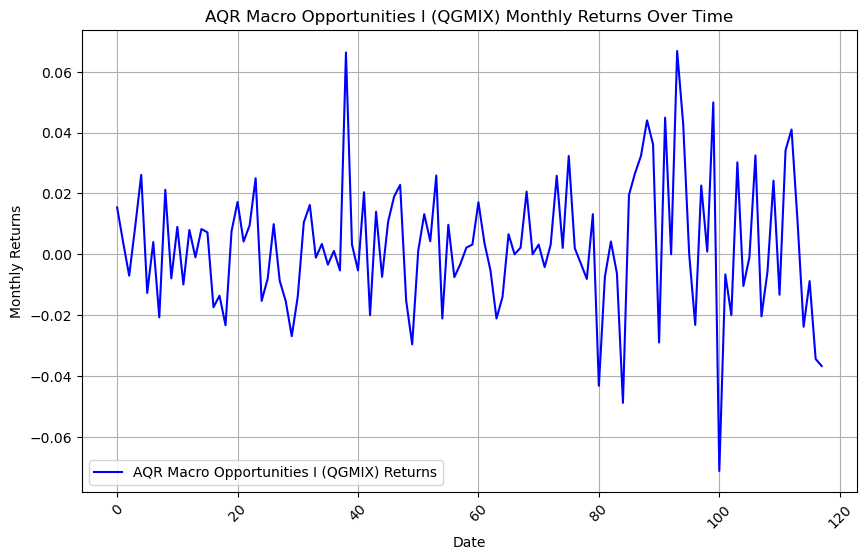

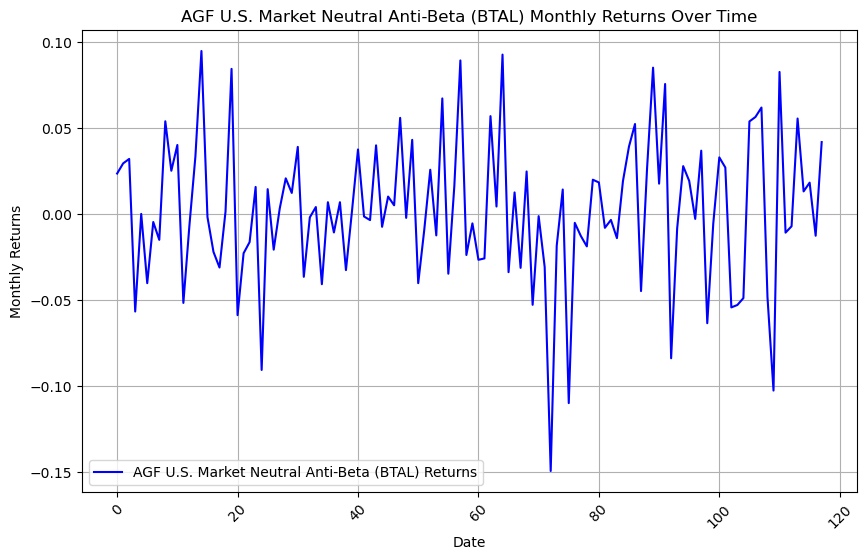

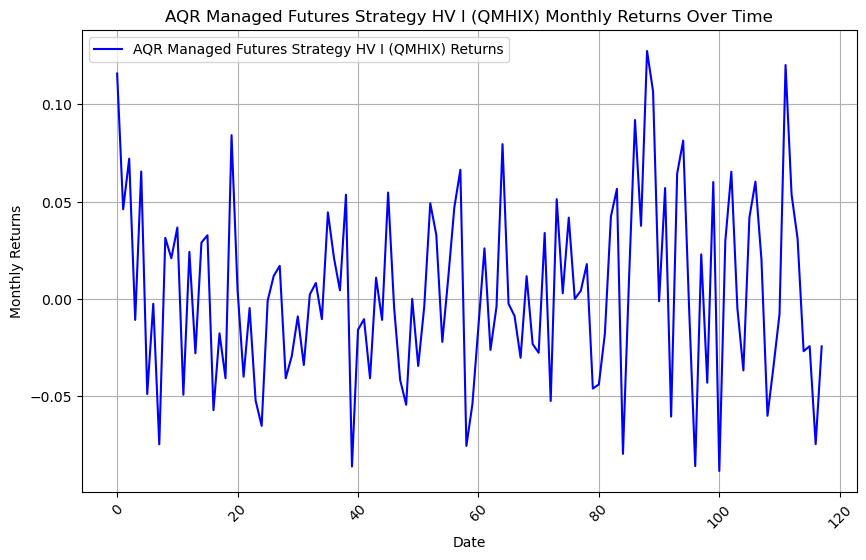

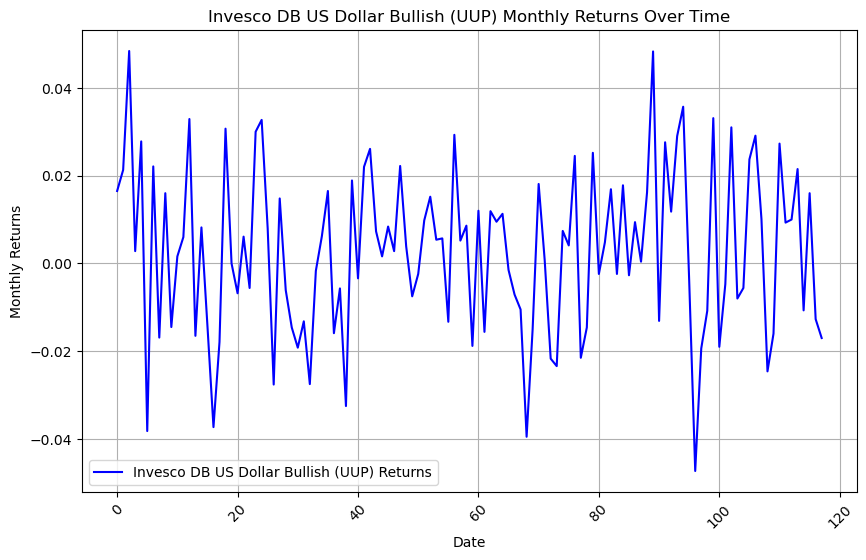

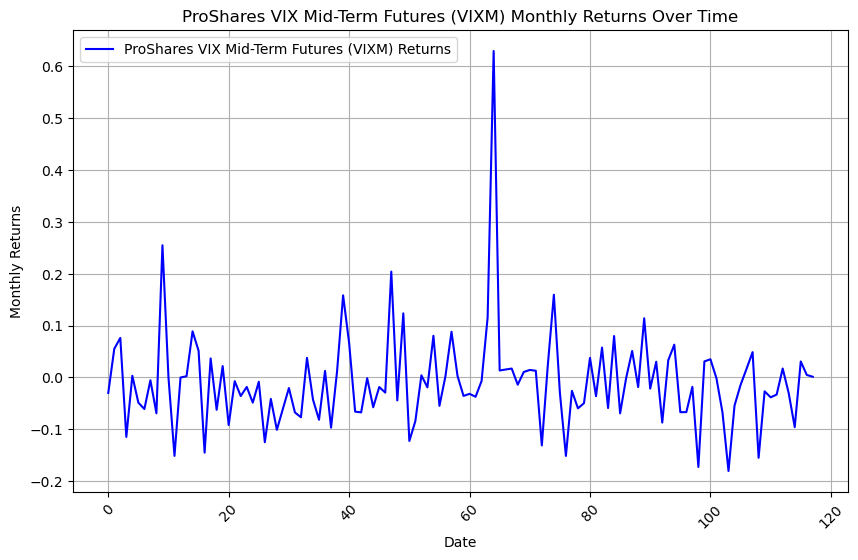

In [8]:
# PLOT MONTHLY RETURNS

import matplotlib.pyplot as plt

# Generate time series plots for each asset (excluding the 'Date' index)
for asset in data.columns:  # Loop through all asset columns
    if asset != 'Date':  # Exclude 'Date'
        plt.figure(figsize=(10, 6))
        plt.plot(data.index, data[asset], label=f"{asset} Returns", color='blue')
        plt.title(f"{asset} Monthly Returns Over Time")
        plt.xlabel("Date")
        plt.ylabel("Monthly Returns")
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.legend()
        plt.show()


Vanguard LifeStrategy Income Fund (VASIX) T-distribution: df=2.2288425023658824, loc=0.003786190884408091, scale=0.009378486887293973


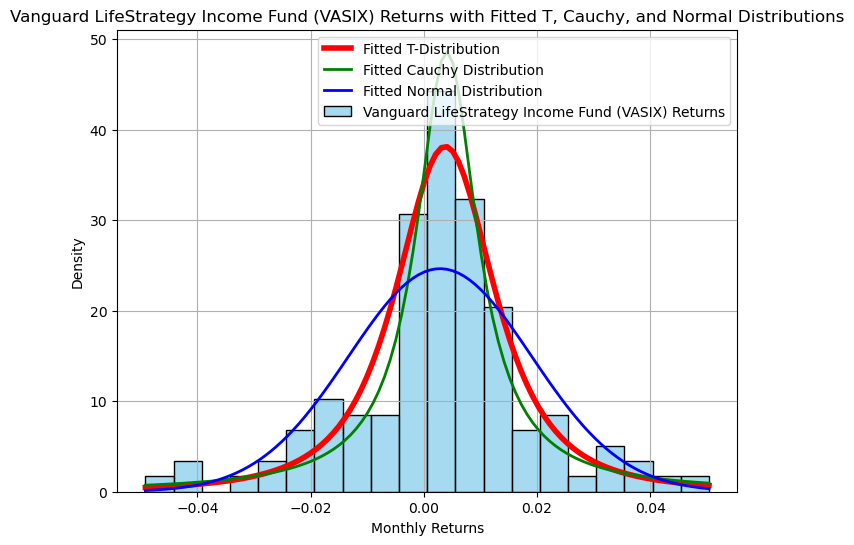

Vanguard Total World Stock ETF (VT) T-distribution: df=6.927263490603995, loc=0.009983805955993678, scale=0.03681965577166231


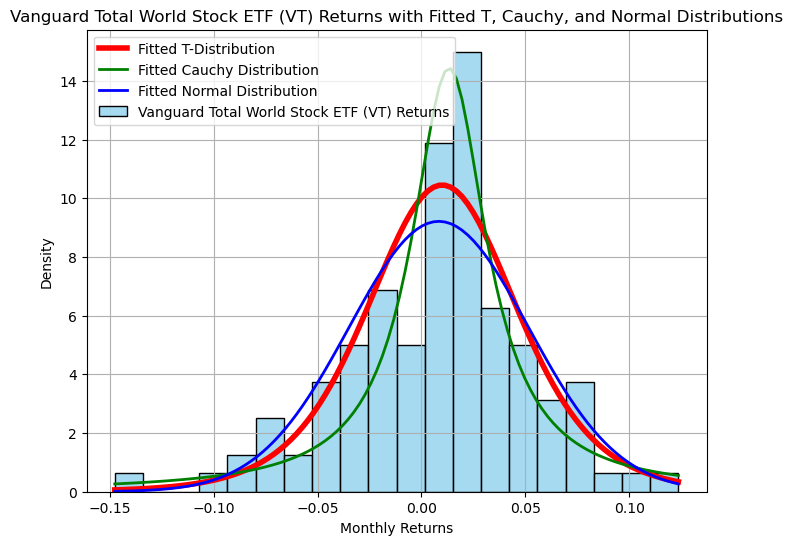

PIMCO 25+ Year Zero Coupon US Trs ETF (ZROZ) T-distribution: df=15.35394542339764, loc=0.00016636947588178654, scale=0.056550628374345026


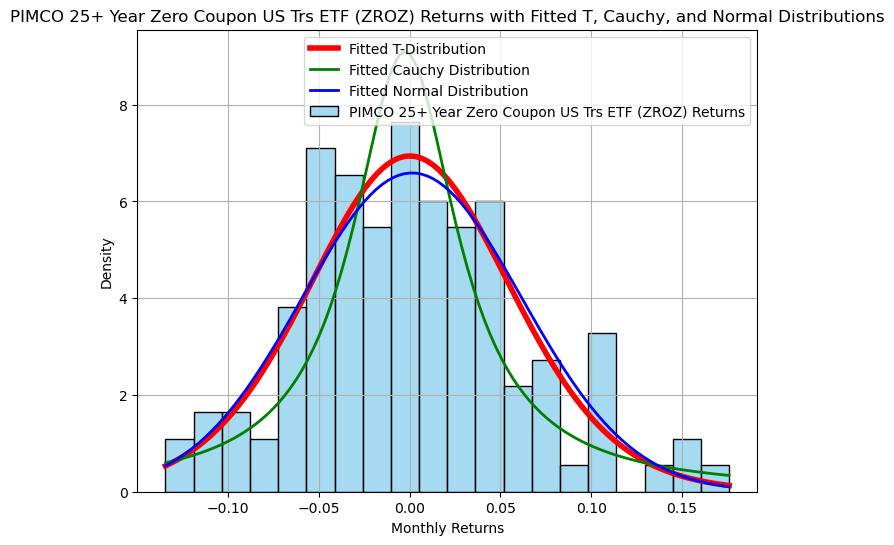

AQR Diversified Arbitrage I (ADAIX) T-distribution: df=2.2009166675468403, loc=0.003517612762481034, scale=0.008116483593920018


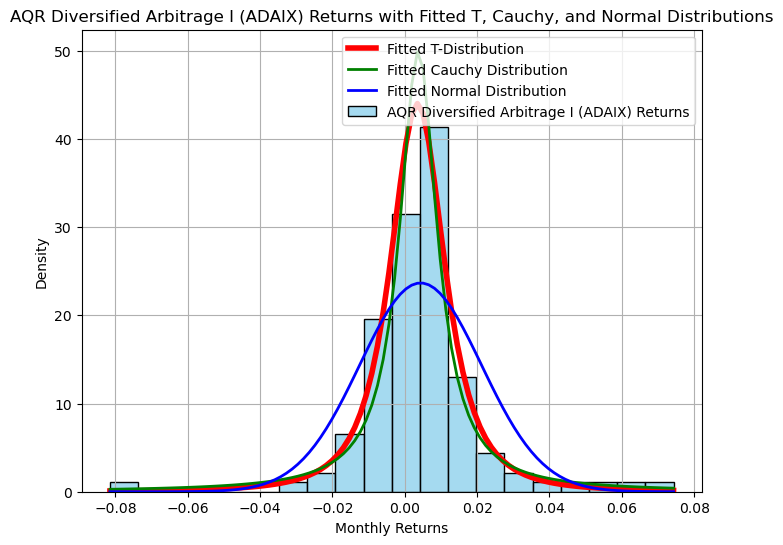

iShares Gold Trust (IAU) T-distribution: df=14565527.373981439, loc=0.0070357068035615256, scale=0.04026809156440496


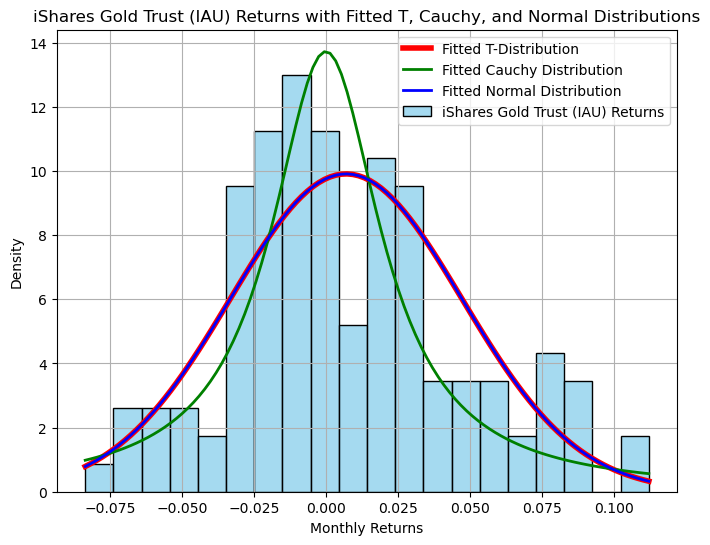

Bitcoin Market Price USD (^BTC) T-distribution: df=10.07876315829359, loc=0.056831739692212425, scale=0.1977792282442895


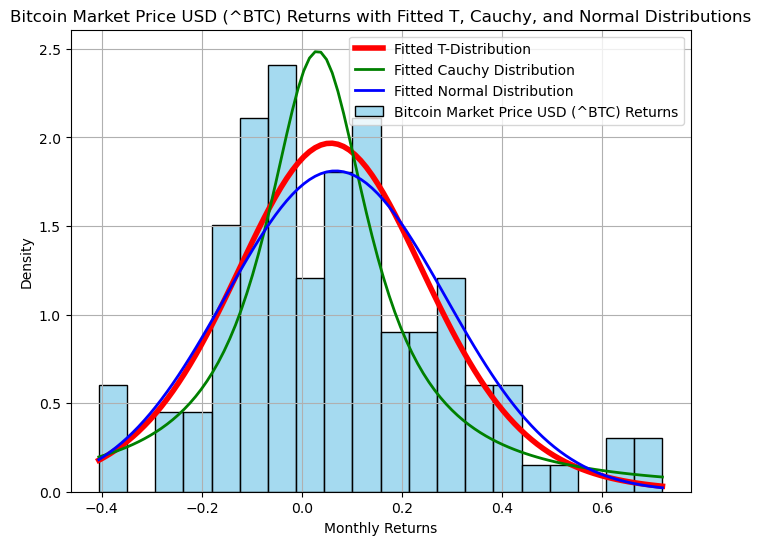

AQR Risk-Balanced Commodities Strategy I (ARCIX) T-distribution: df=87.39249922101007, loc=0.005411478555012962, scale=0.046167603828276046


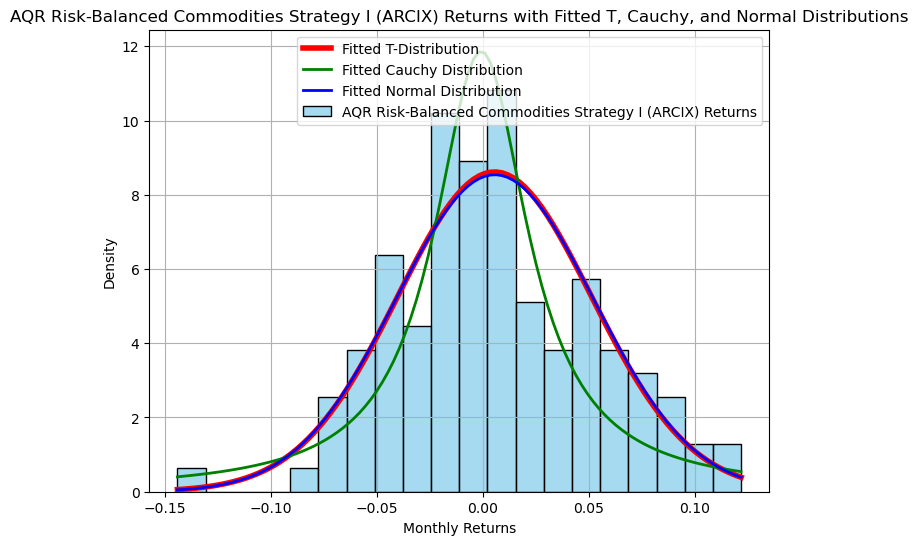

AQR Long-Short Equity I (QLEIX) T-distribution: df=4.553052312108971, loc=0.009054525317437221, scale=0.025453101173271722


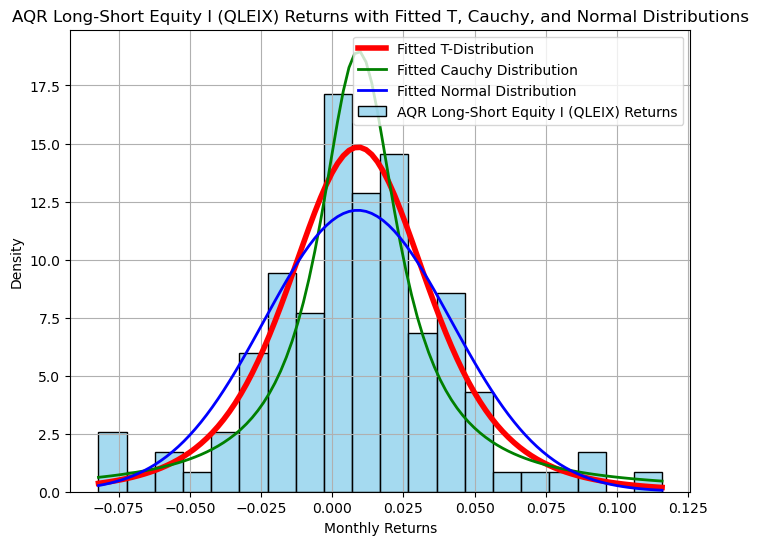

AQR Style Premia Alternative I (QSPIX) T-distribution: df=2.4973596356723506, loc=-6.041392170134708e-06, scale=0.02330625198104625


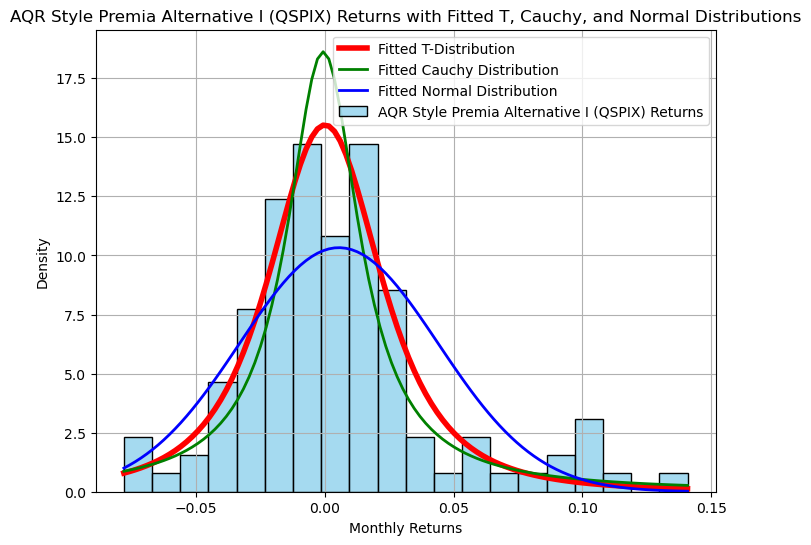

AQR Equity Market Neutral I (QMNIX) T-distribution: df=4.955544584988399, loc=0.003460429313535715, scale=0.022621089262876627


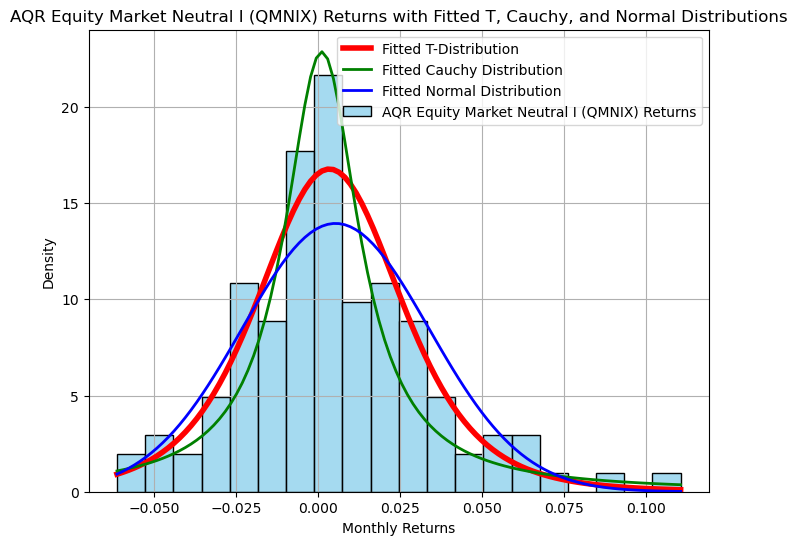

AQR Macro Opportunities I (QGMIX) T-distribution: df=5.521327574696068, loc=0.0023483087771237502, scale=0.0176149404186967


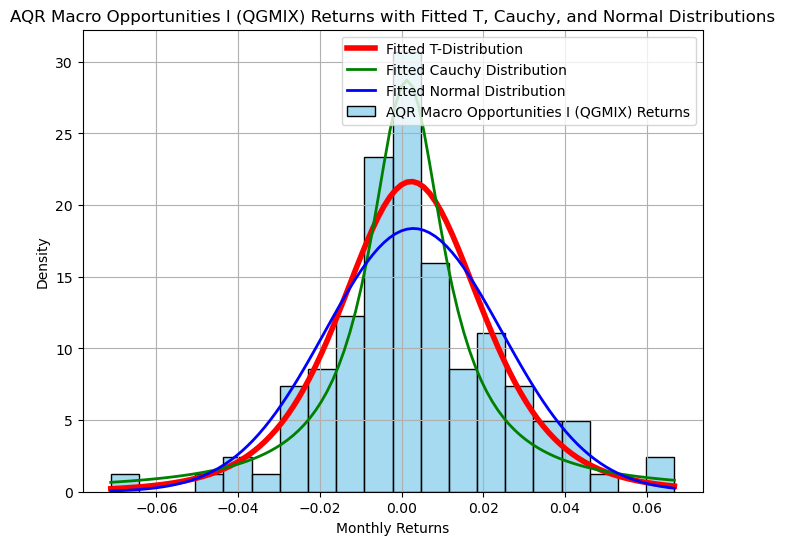

AGF U.S. Market Neutral Anti-Beta (BTAL) T-distribution: df=7.22144607553566, loc=0.0026844257221600607, scale=0.0365245210566917


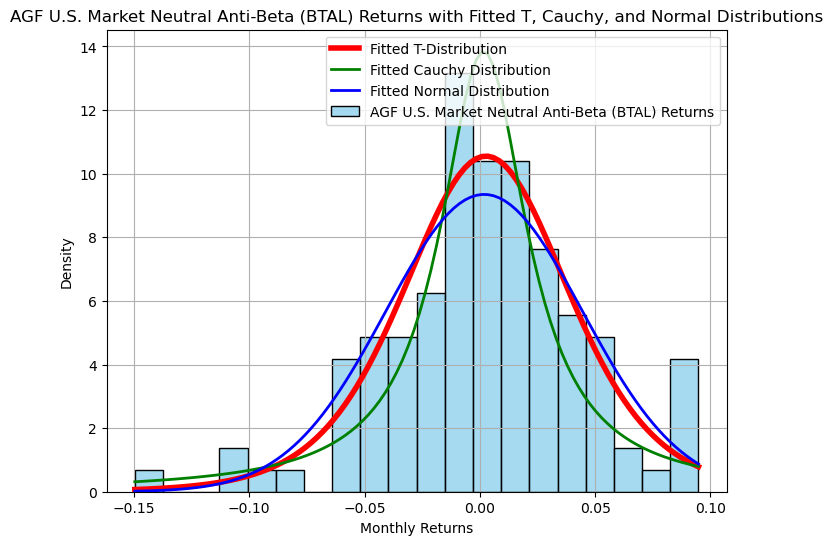

AQR Managed Futures Strategy HV I (QMHIX) T-distribution: df=110802937.06946045, loc=0.0035630421430890265, scale=0.04722085538393693


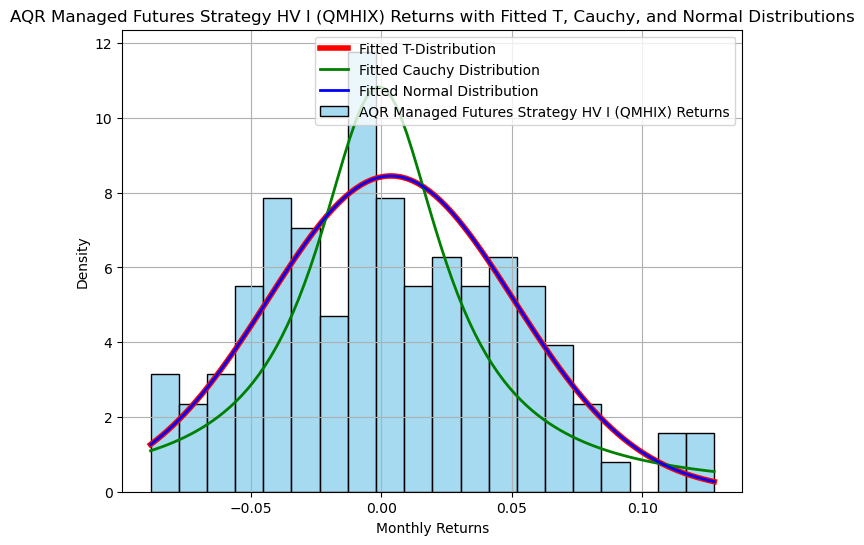

Invesco DB US Dollar Bullish (UUP) T-distribution: df=500790719.58714867, loc=0.002767769419881067, scale=0.01905010549313299


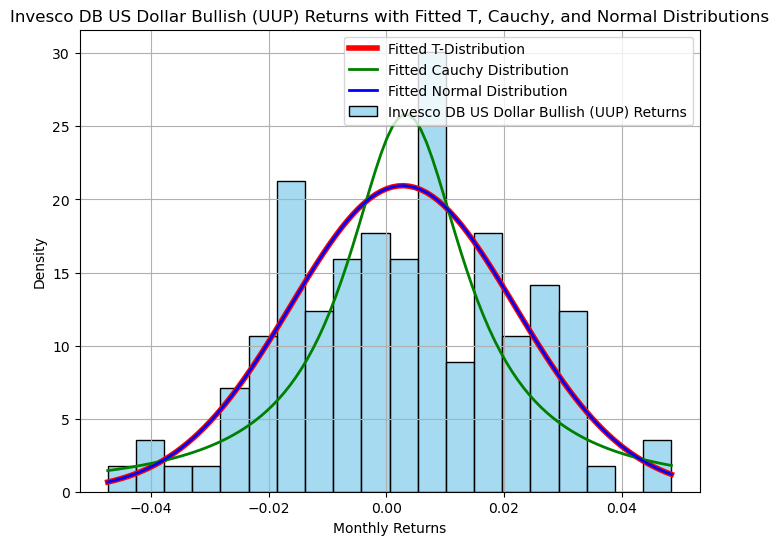

ProShares VIX Mid-Term Futures (VIXM) T-distribution: df=2.9092924277569763, loc=-0.016996257437278835, scale=0.052100060765440076


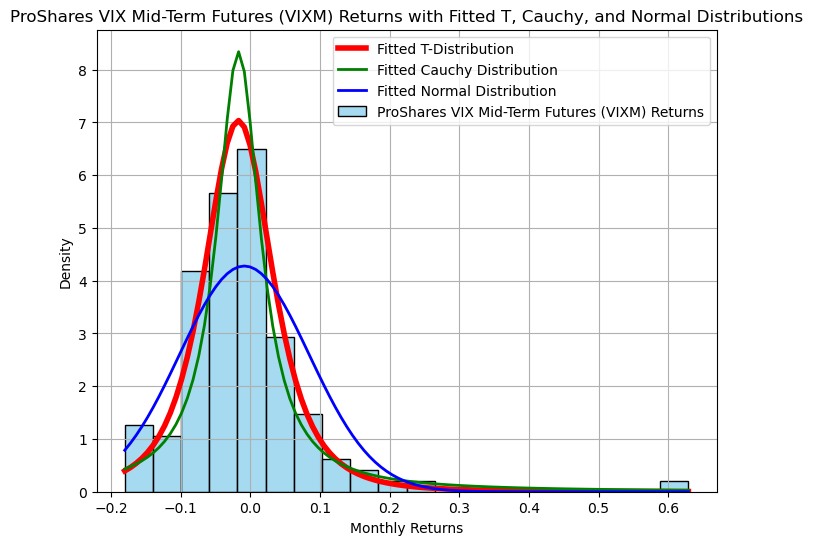

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t, cauchy, norm

# Load the dataset to inspect the contents
file_path = 'Opportunity_Set.xlsx'
data = pd.read_excel(file_path)

for asset in data.columns:
    if asset != 'Date':
        asset_returns = data[asset].dropna()  # Ensure no NaNs in returns data
        x = np.linspace(asset_returns.min(), asset_returns.max(), 100)

        # Fit the T-distribution
        df_t, loc_t, scale_t = t.fit(asset_returns)
        print(f"{asset} T-distribution: df={df_t}, loc={loc_t}, scale={scale_t}")
        pdf_t = t.pdf(x, df_t, loc_t, scale_t)

        # Fit the Cauchy distribution
        loc_cauchy, scale_cauchy = cauchy.fit(asset_returns)
        pdf_cauchy = cauchy.pdf(x, loc_cauchy, scale_cauchy)

        # Fit the Normal distribution
        mu_normal, std_normal = norm.fit(asset_returns)
        pdf_normal = norm.pdf(x, mu_normal, std_normal)

        # Plot the asset returns with fitted distributions
        plt.figure(figsize=(8, 6))
        sns.histplot(asset_returns, bins=20, kde=False, stat='density', color='skyblue', label=f'{asset} Returns')
        plt.plot(x, pdf_t, 'r-', lw=4, label='Fitted T-Distribution')
        plt.plot(x, pdf_cauchy, 'g-', lw=2, label='Fitted Cauchy Distribution')
        plt.plot(x, pdf_normal, 'b-', lw=2, label='Fitted Normal Distribution')
        plt.title(f"{asset} Returns with Fitted T, Cauchy, and Normal Distributions")
        plt.xlabel("Monthly Returns")
        plt.ylabel("Density")
        plt.legend()
        plt.grid(True)
        plt.show()


Processing asset: Vanguard LifeStrategy Income Fund (VASIX)
Sample size for Vanguard LifeStrategy Income Fund (VASIX): 118
Generated 10000 bootstrap samples for Vanguard LifeStrategy Income Fund (VASIX)
T-distribution (bootstrap sample 1) for Vanguard LifeStrategy Income Fund (VASIX): df=2.3666167916770764, loc=0.004403291331157508, scale=0.009213248207250398
Cauchy distribution (bootstrap sample 1) for Vanguard LifeStrategy Income Fund (VASIX): loc=0.0044396339416503915, scale=0.006549644680023196
Normal distribution (bootstrap sample 1) for Vanguard LifeStrategy Income Fund (VASIX): mu=0.0026618644067796615, std=0.015686104827508346


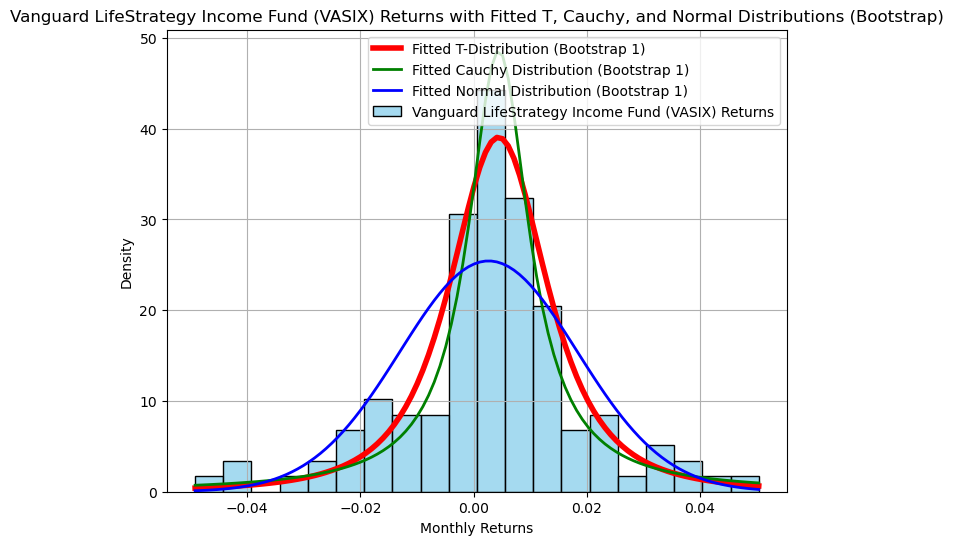

Processing asset: Vanguard Total World Stock ETF (VT)
Sample size for Vanguard Total World Stock ETF (VT): 118
Generated 10000 bootstrap samples for Vanguard Total World Stock ETF (VT)
T-distribution (bootstrap sample 1) for Vanguard Total World Stock ETF (VT): df=15.20948212866847, loc=0.0066052965781410915, scale=0.04172256978324973
Cauchy distribution (bootstrap sample 1) for Vanguard Total World Stock ETF (VT): loc=0.009983117675781248, scale=0.02337464778900146
Normal distribution (bootstrap sample 1) for Vanguard Total World Stock ETF (VT): mu=0.006144915254237289, std=0.04473857698626019


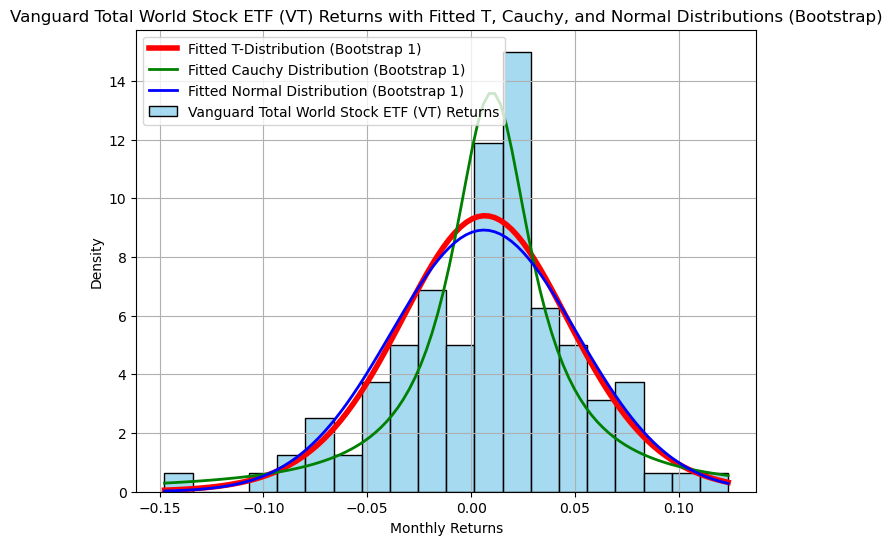

Processing asset: PIMCO 25+ Year Zero Coupon US Trs ETF (ZROZ)
Sample size for PIMCO 25+ Year Zero Coupon US Trs ETF (ZROZ): 118
Generated 10000 bootstrap samples for PIMCO 25+ Year Zero Coupon US Trs ETF (ZROZ)
T-distribution (bootstrap sample 1) for PIMCO 25+ Year Zero Coupon US Trs ETF (ZROZ): df=144713266.4730389, loc=3.1386872436358106e-06, scale=0.06340827307986327
Cauchy distribution (bootstrap sample 1) for PIMCO 25+ Year Zero Coupon US Trs ETF (ZROZ): loc=-0.005470179550945762, scale=0.0365895096763222
Normal distribution (bootstrap sample 1) for PIMCO 25+ Year Zero Coupon US Trs ETF (ZROZ): mu=3.389830508474585e-06, std=0.0634081010332642


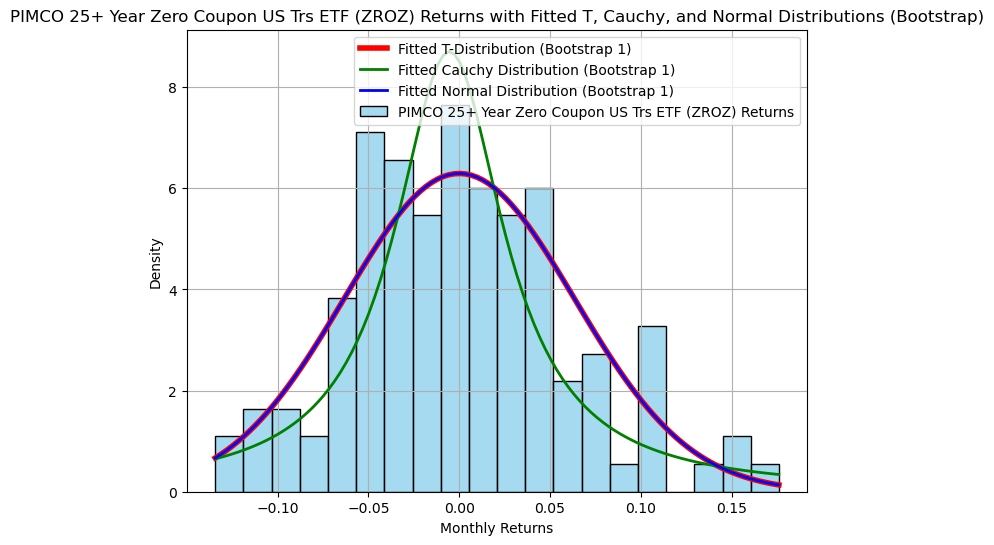

Processing asset: AQR Diversified Arbitrage I (ADAIX)
Sample size for AQR Diversified Arbitrage I (ADAIX): 118
Generated 10000 bootstrap samples for AQR Diversified Arbitrage I (ADAIX)
T-distribution (bootstrap sample 1) for AQR Diversified Arbitrage I (ADAIX): df=1.877635219842304, loc=0.0029264419520222823, scale=0.0071118114124558394
Cauchy distribution (bootstrap sample 1) for AQR Diversified Arbitrage I (ADAIX): loc=0.003289182974398143, scale=0.0057728904211521125
Normal distribution (bootstrap sample 1) for AQR Diversified Arbitrage I (ADAIX): mu=0.004142372881355932, std=0.018100502880829736


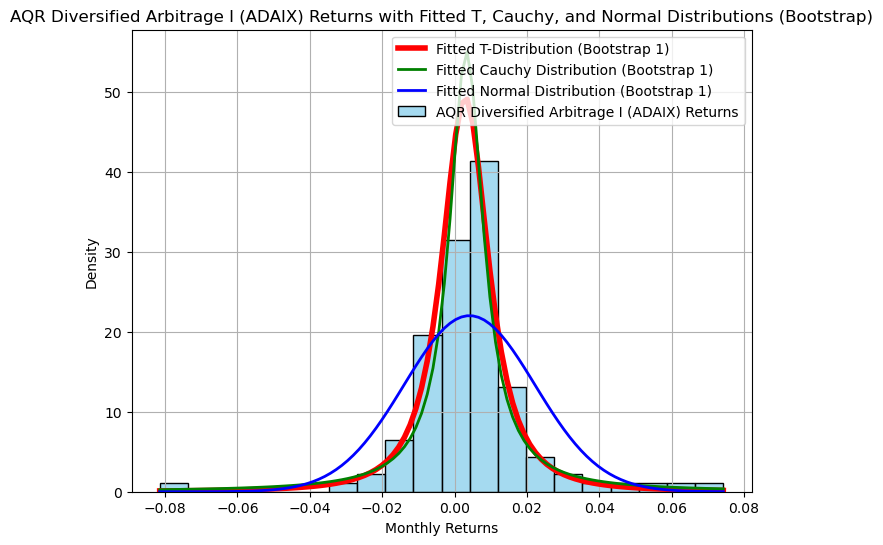

Processing asset: iShares Gold Trust (IAU)
Sample size for iShares Gold Trust (IAU): 118
Generated 10000 bootstrap samples for iShares Gold Trust (IAU)
T-distribution (bootstrap sample 1) for iShares Gold Trust (IAU): df=5.6831041403908005, loc=0.0011758087608717046, scale=0.02747962435098841
Cauchy distribution (bootstrap sample 1) for iShares Gold Trust (IAU): loc=-0.002979602050781249, scale=0.018459184570312516
Normal distribution (bootstrap sample 1) for iShares Gold Trust (IAU): mu=0.003427966101694916, std=0.033702202527213135


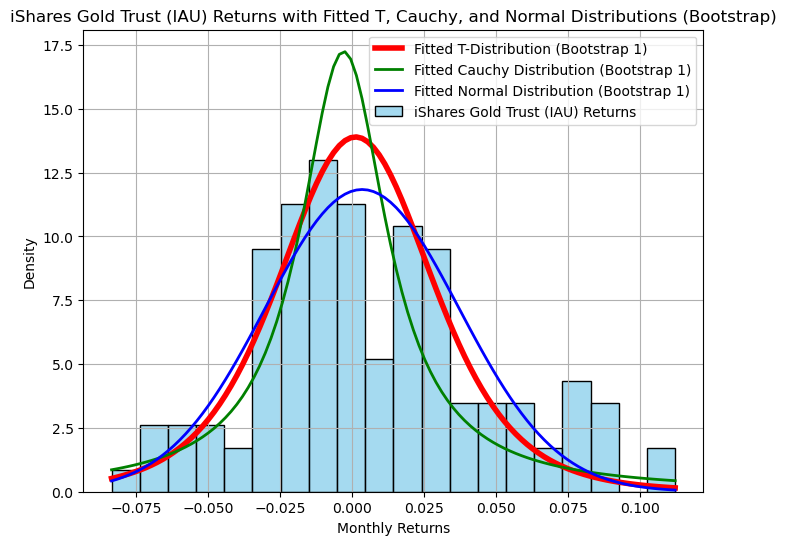

Processing asset: Bitcoin Market Price USD (^BTC)
Sample size for Bitcoin Market Price USD (^BTC): 118
Generated 10000 bootstrap samples for Bitcoin Market Price USD (^BTC)
T-distribution (bootstrap sample 1) for Bitcoin Market Price USD (^BTC): df=7.546220658336079, loc=0.0412092991134226, scale=0.18876646912955428
Cauchy distribution (bootstrap sample 1) for Bitcoin Market Price USD (^BTC): loc=0.0065208931490033945, scale=0.12457946370965281
Normal distribution (bootstrap sample 1) for Bitcoin Market Price USD (^BTC): mu=0.05271694915254238, std=0.2192459969311945


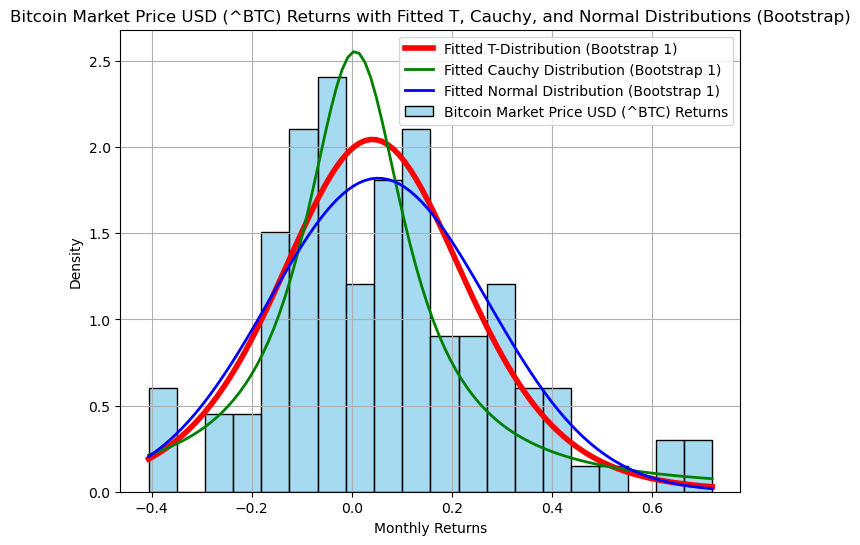

Processing asset: AQR Risk-Balanced Commodities Strategy I (ARCIX)
Sample size for AQR Risk-Balanced Commodities Strategy I (ARCIX): 118
Generated 10000 bootstrap samples for AQR Risk-Balanced Commodities Strategy I (ARCIX)
T-distribution (bootstrap sample 1) for AQR Risk-Balanced Commodities Strategy I (ARCIX): df=1548.759452812755, loc=0.014174124217295274, scale=0.04769750040355186
Cauchy distribution (bootstrap sample 1) for AQR Risk-Balanced Commodities Strategy I (ARCIX): loc=0.003395272443294531, scale=0.026639395728111276
Normal distribution (bootstrap sample 1) for AQR Risk-Balanced Commodities Strategy I (ARCIX): mu=0.014176271186440674, std=0.04772833021110226


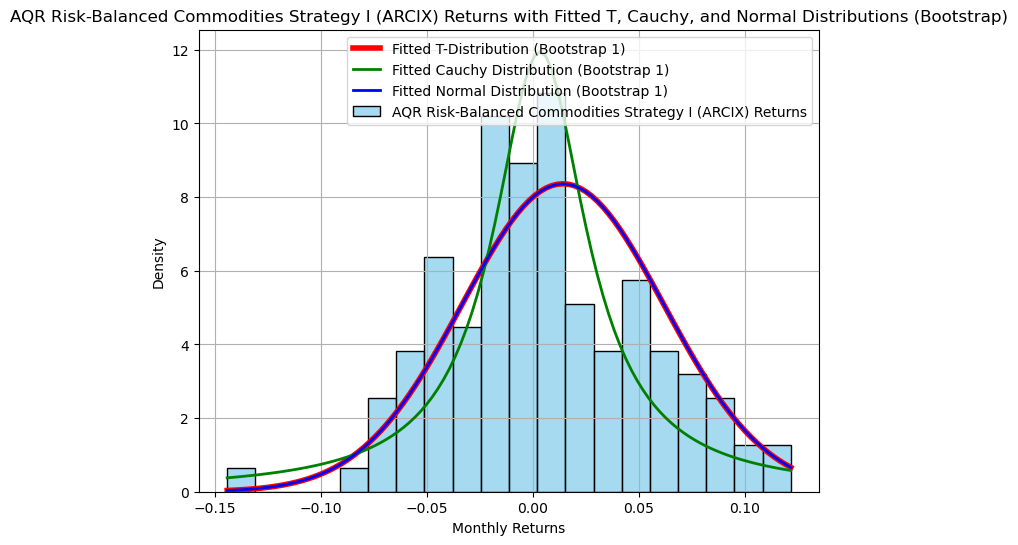

Processing asset: AQR Long-Short Equity I (QLEIX)
Sample size for AQR Long-Short Equity I (QLEIX): 118
Generated 10000 bootstrap samples for AQR Long-Short Equity I (QLEIX)
T-distribution (bootstrap sample 1) for AQR Long-Short Equity I (QLEIX): df=7.475732854085032, loc=0.012529932510023848, scale=0.025706092498486453
Cauchy distribution (bootstrap sample 1) for AQR Long-Short Equity I (QLEIX): loc=0.012781528472900393, scale=0.017007206344604488
Normal distribution (bootstrap sample 1) for AQR Long-Short Equity I (QLEIX): mu=0.011739830508474576, std=0.029888771600182613


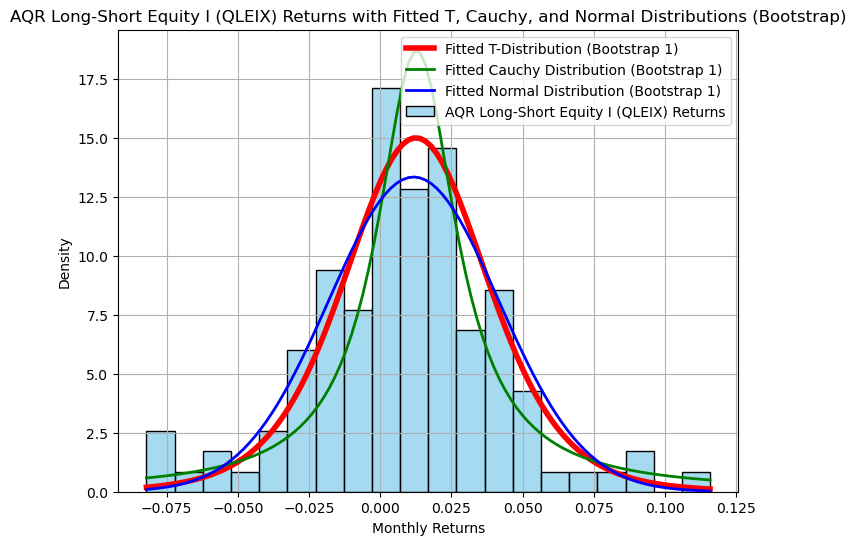

Processing asset: AQR Style Premia Alternative I (QSPIX)
Sample size for AQR Style Premia Alternative I (QSPIX): 118
Generated 10000 bootstrap samples for AQR Style Premia Alternative I (QSPIX)
T-distribution (bootstrap sample 1) for AQR Style Premia Alternative I (QSPIX): df=2.8424020387704125, loc=-0.001454686314900392, scale=0.02375753808233197
Cauchy distribution (bootstrap sample 1) for AQR Style Premia Alternative I (QSPIX): loc=-0.00279577880859375, scale=0.016846835937499992
Normal distribution (bootstrap sample 1) for AQR Style Premia Alternative I (QSPIX): mu=0.003643220338983051, std=0.036800150789147494


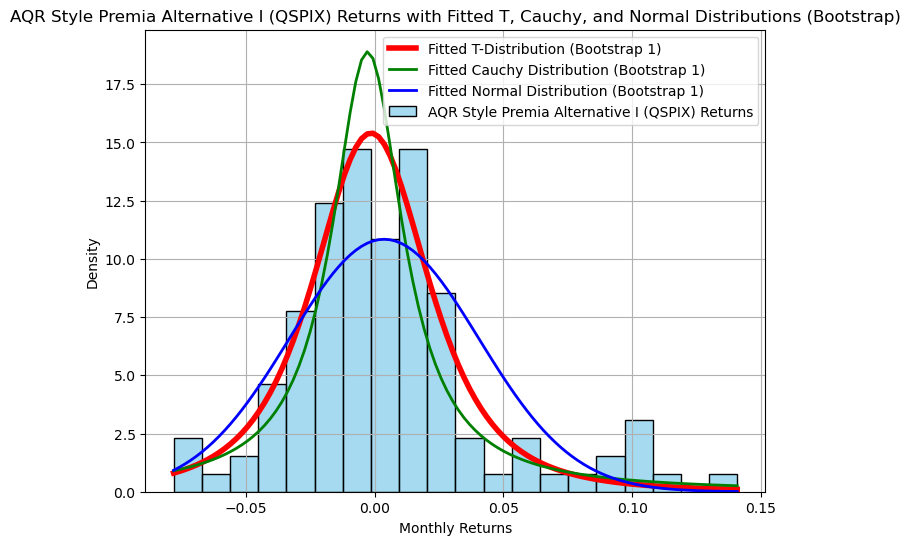

Processing asset: AQR Equity Market Neutral I (QMNIX)
Sample size for AQR Equity Market Neutral I (QMNIX): 118
Generated 10000 bootstrap samples for AQR Equity Market Neutral I (QMNIX)
T-distribution (bootstrap sample 1) for AQR Equity Market Neutral I (QMNIX): df=9.575256975599842, loc=0.0018139326180158042, scale=0.024256403478068695
Cauchy distribution (bootstrap sample 1) for AQR Equity Market Neutral I (QMNIX): loc=-0.00014702974498272088, scale=0.014633834712505416
Normal distribution (bootstrap sample 1) for AQR Equity Market Neutral I (QMNIX): mu=0.0028932203389830506, std=0.027306802805526786


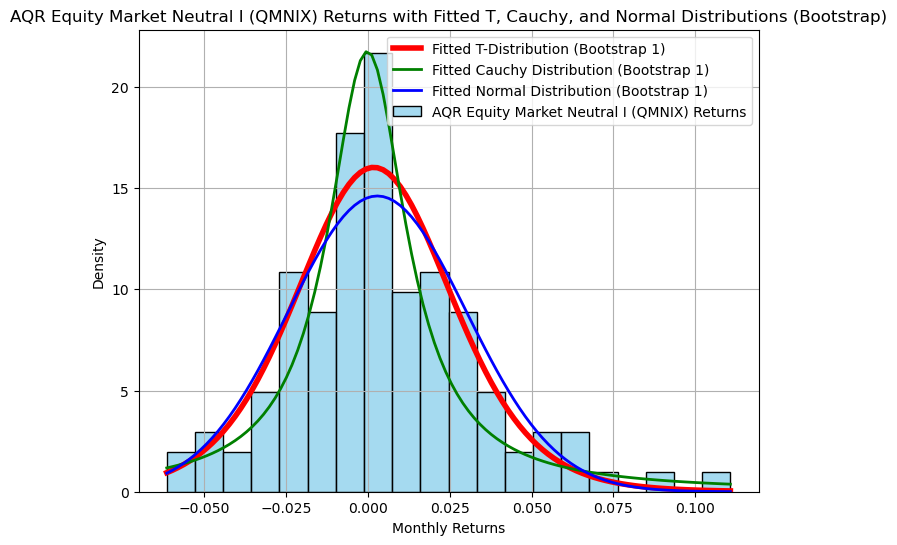

Processing asset: AQR Macro Opportunities I (QGMIX)
Sample size for AQR Macro Opportunities I (QGMIX): 118
Generated 10000 bootstrap samples for AQR Macro Opportunities I (QGMIX)
T-distribution (bootstrap sample 1) for AQR Macro Opportunities I (QGMIX): df=6.35647879477872, loc=0.00037322954539779495, scale=0.0184969430645074
Cauchy distribution (bootstrap sample 1) for AQR Macro Opportunities I (QGMIX): loc=0.0010969039356708568, scale=0.011730522531867061
Normal distribution (bootstrap sample 1) for AQR Macro Opportunities I (QGMIX): mu=-0.0003864406779661015, std=0.02216797168635775


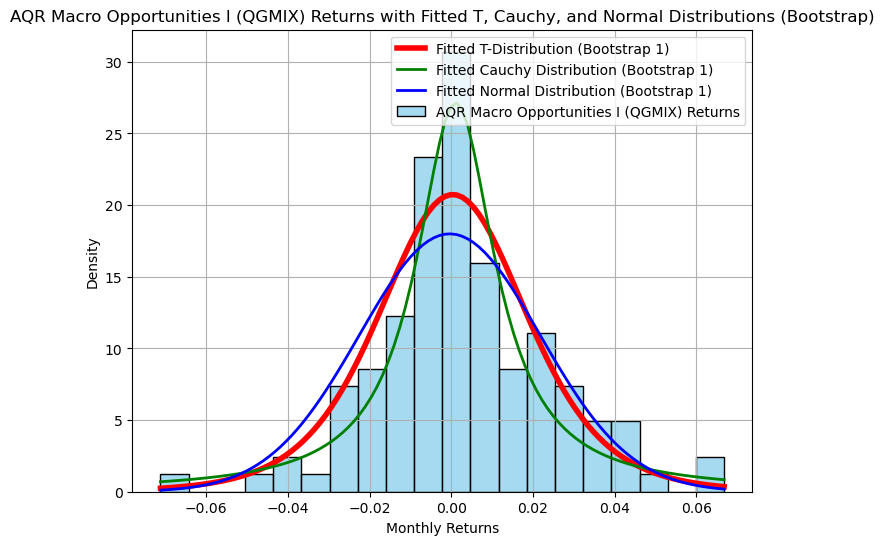

Processing asset: AGF U.S. Market Neutral Anti-Beta (BTAL)
Sample size for AGF U.S. Market Neutral Anti-Beta (BTAL): 118
Generated 10000 bootstrap samples for AGF U.S. Market Neutral Anti-Beta (BTAL)
T-distribution (bootstrap sample 1) for AGF U.S. Market Neutral Anti-Beta (BTAL): df=10385500.386195961, loc=-0.004072442504088567, scale=0.04100137461774746
Cauchy distribution (bootstrap sample 1) for AGF U.S. Market Neutral Anti-Beta (BTAL): loc=0.0004423810577392503, scale=0.024803297996520916
Normal distribution (bootstrap sample 1) for AGF U.S. Market Neutral Anti-Beta (BTAL): mu=-0.004072881355932203, std=0.0410013097372799


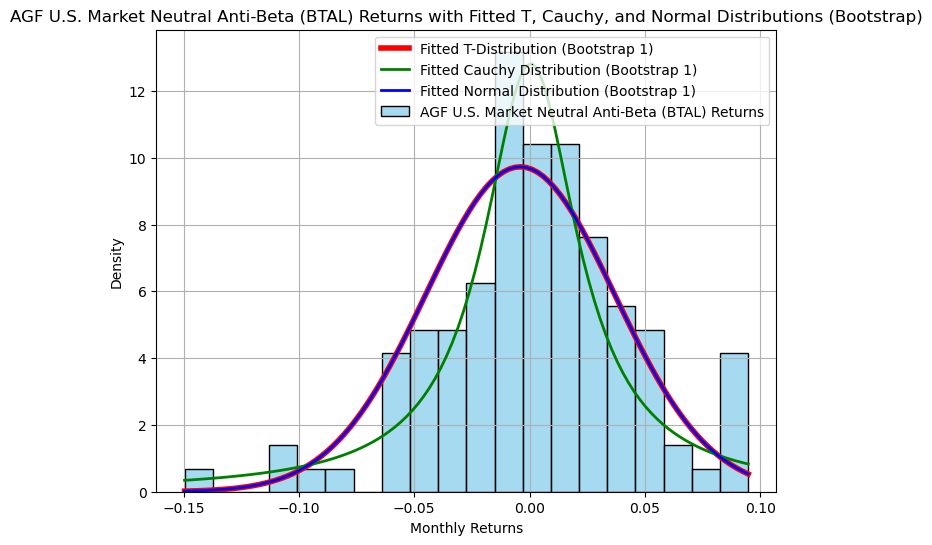

Processing asset: AQR Managed Futures Strategy HV I (QMHIX)
Sample size for AQR Managed Futures Strategy HV I (QMHIX): 118
Generated 10000 bootstrap samples for AQR Managed Futures Strategy HV I (QMHIX)
T-distribution (bootstrap sample 1) for AQR Managed Futures Strategy HV I (QMHIX): df=69155821.6621166, loc=0.0011307196635802347, scale=0.047597489733683315
Cauchy distribution (bootstrap sample 1) for AQR Managed Futures Strategy HV I (QMHIX): loc=-0.001071263236999512, scale=0.031158149414062503
Normal distribution (bootstrap sample 1) for AQR Managed Futures Strategy HV I (QMHIX): mu=0.0011313559322033903, std=0.047597186391621256


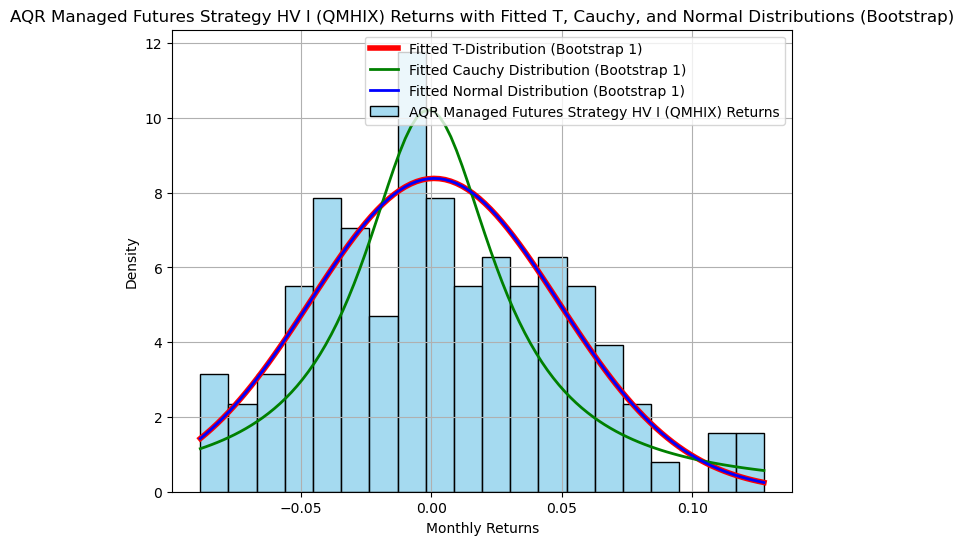

Processing asset: Invesco DB US Dollar Bullish (UUP)
Sample size for Invesco DB US Dollar Bullish (UUP): 118
Generated 10000 bootstrap samples for Invesco DB US Dollar Bullish (UUP)
T-distribution (bootstrap sample 1) for Invesco DB US Dollar Bullish (UUP): df=12346666405.586113, loc=0.0025643706870820604, scale=0.019043042411936918
Cauchy distribution (bootstrap sample 1) for Invesco DB US Dollar Bullish (UUP): loc=0.004038012695312501, scale=0.012722971191406246
Normal distribution (bootstrap sample 1) for Invesco DB US Dollar Bullish (UUP): mu=0.0025644067796610167, std=0.019043026774015894


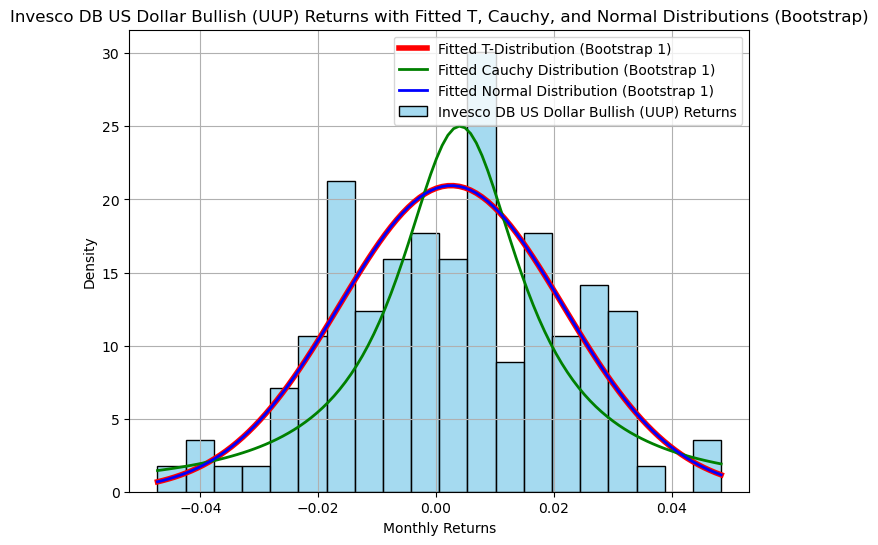

Processing asset: ProShares VIX Mid-Term Futures (VIXM)
Sample size for ProShares VIX Mid-Term Futures (VIXM): 118
Generated 10000 bootstrap samples for ProShares VIX Mid-Term Futures (VIXM)
T-distribution (bootstrap sample 1) for ProShares VIX Mid-Term Futures (VIXM): df=2.2896138784564024, loc=-0.012824955300121, scale=0.04289737703633623
Cauchy distribution (bootstrap sample 1) for ProShares VIX Mid-Term Futures (VIXM): loc=-0.008360548629760729, scale=0.03219361289978036
Normal distribution (bootstrap sample 1) for ProShares VIX Mid-Term Futures (VIXM): mu=-0.00863135593220339, std=0.10305168170171354


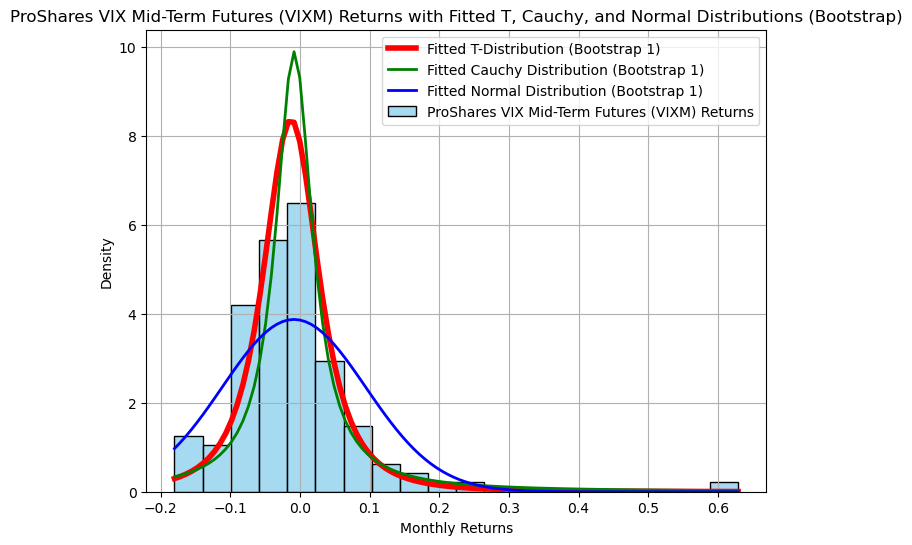

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t, cauchy, norm

# Number of bootstrap iterations
n_iterations = 10000

# Iterate over each asset, excluding the 'Date' column
for asset in data.columns:
    if asset != 'Date':
        print(f"Processing asset: {asset}")  # Debug: Check asset being processed
        asset_returns = data[asset].dropna()  # Ensure no NaNs in returns data
        print(f"Sample size for {asset}: {len(asset_returns)}")  # Debug: Check sample size
        x = np.linspace(asset_returns.min(), asset_returns.max(), 100)

        # Non-parametric bootstrap: Resample with replacement
        bootstrap_samples = np.random.choice(asset_returns, size=(len(asset_returns), n_iterations), replace=True)
        print(f"Generated {n_iterations} bootstrap samples for {asset}")  # Debug: Check bootstrap generation

        # Use the first bootstrap sample to fit distributions
        first_bootstrap_sample = bootstrap_samples[:, 0]

        # Fit the T-distribution to the first bootstrap sample
        df_t, loc_t, scale_t = t.fit(first_bootstrap_sample)
        print(f"T-distribution (bootstrap sample 1) for {asset}: df={df_t}, loc={loc_t}, scale={scale_t}")  # Debug

        # Fit the Cauchy distribution to the first bootstrap sample
        loc_cauchy, scale_cauchy = cauchy.fit(first_bootstrap_sample)
        print(f"Cauchy distribution (bootstrap sample 1) for {asset}: loc={loc_cauchy}, scale={scale_cauchy}")  # Debug

        # Fit the Normal distribution to the first bootstrap sample
        mu_normal, std_normal = norm.fit(first_bootstrap_sample)
        print(f"Normal distribution (bootstrap sample 1) for {asset}: mu={mu_normal}, std={std_normal}")  # Debug

        # Plot the original asset returns with the fitted distributions from the first bootstrap sample
        plt.figure(figsize=(8, 6))
        sns.histplot(asset_returns, bins=20, kde=False, stat='density', color='skyblue', label=f'{asset} Returns')

        # Plot the T-distribution fitted from the first bootstrap sample
        pdf_t = t.pdf(x, df_t, loc_t, scale_t)
        plt.plot(x, pdf_t, 'r-', lw=4, label='Fitted T-Distribution (Bootstrap 1)')

        # Plot the Cauchy distribution fitted from the first bootstrap sample
        pdf_cauchy = cauchy.pdf(x, loc_cauchy, scale_cauchy)
        plt.plot(x, pdf_cauchy, 'g-', lw=2, label='Fitted Cauchy Distribution (Bootstrap 1)')

        # Plot the Normal distribution fitted from the first bootstrap sample
        pdf_normal = norm.pdf(x, mu_normal, std_normal)
        plt.plot(x, pdf_normal, 'b-', lw=2, label='Fitted Normal Distribution (Bootstrap 1)')

        plt.title(f"{asset} Returns with Fitted T, Cauchy, and Normal Distributions (Bootstrap)")
        plt.xlabel("Monthly Returns")
        plt.ylabel("Density")
        plt.legend()
        plt.grid(True)
        plt.show()



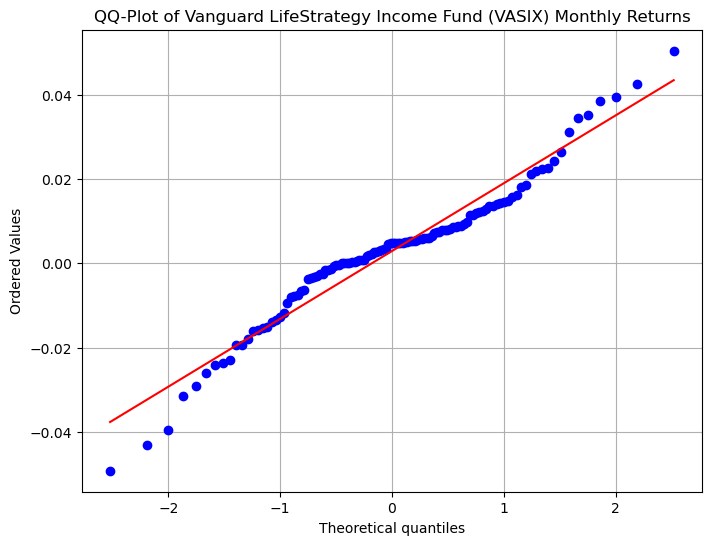

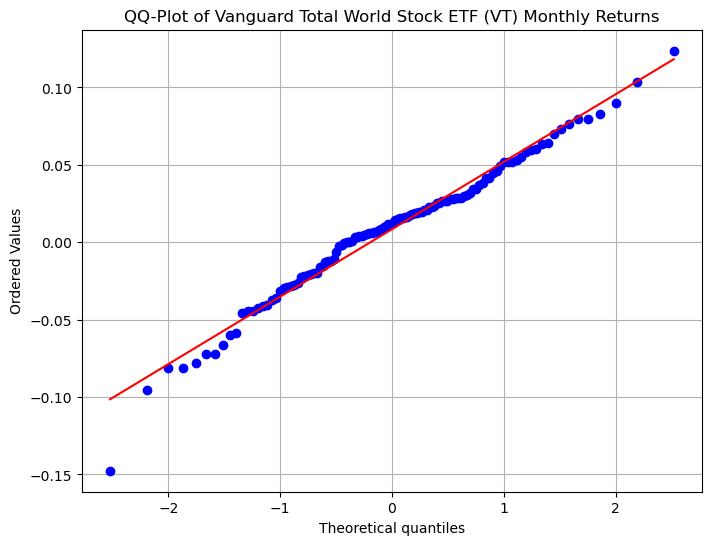

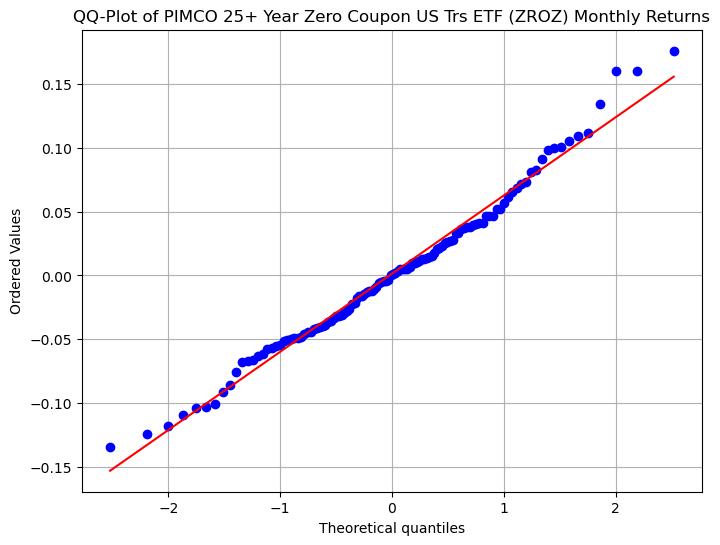

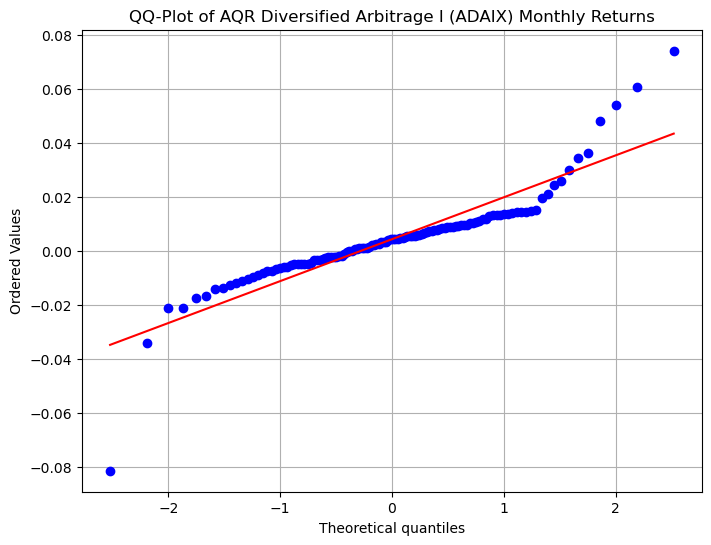

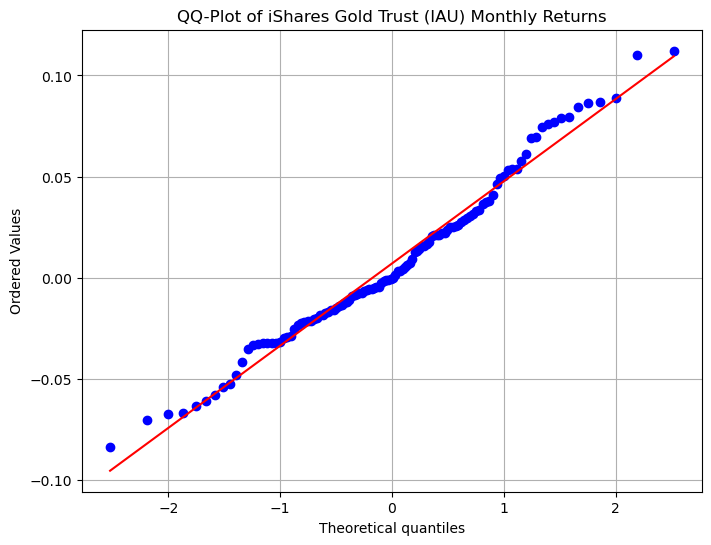

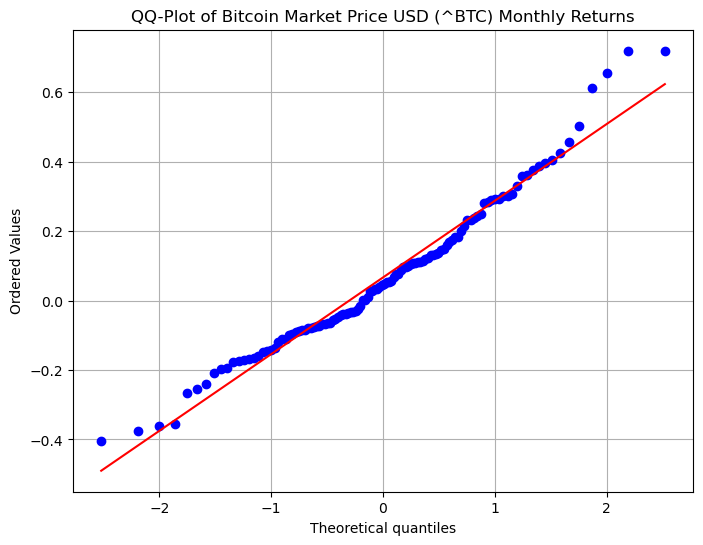

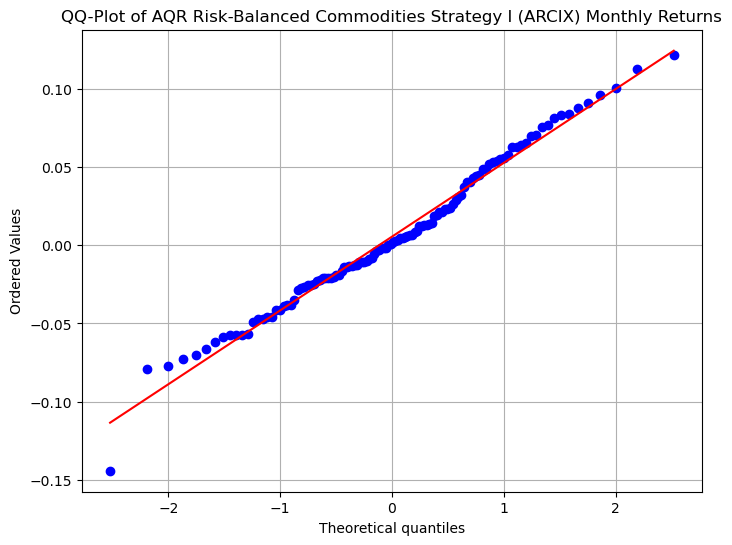

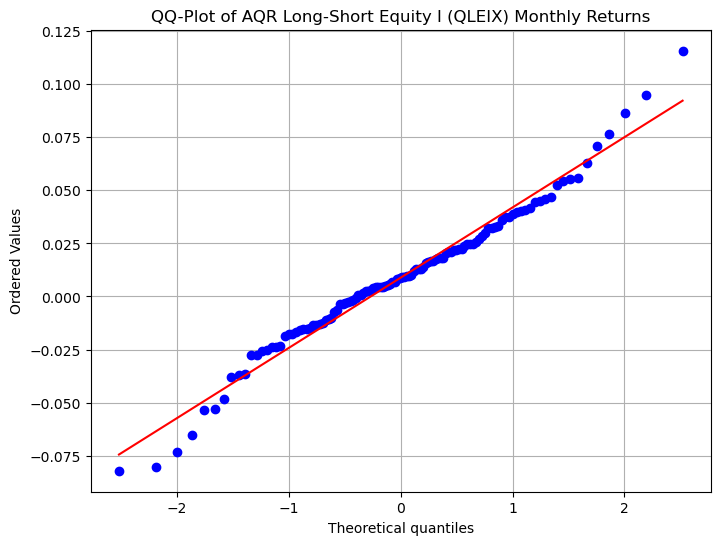

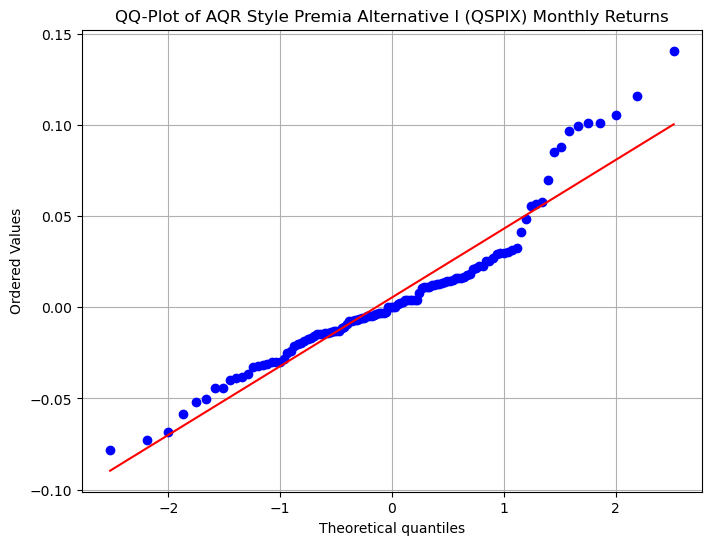

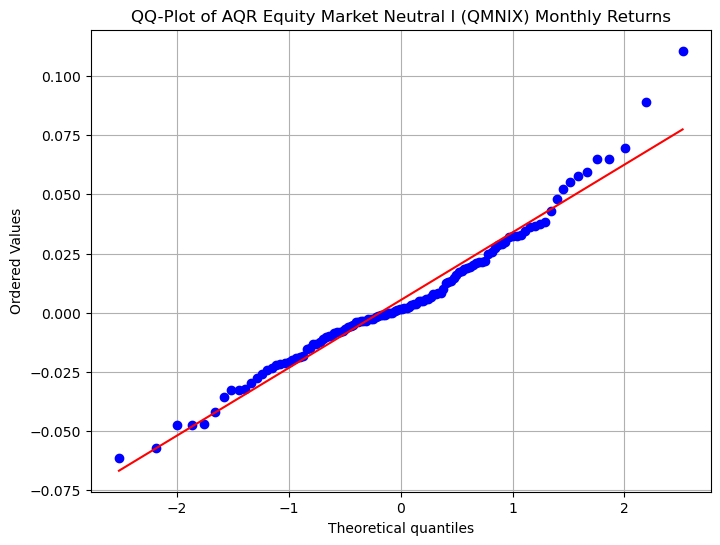

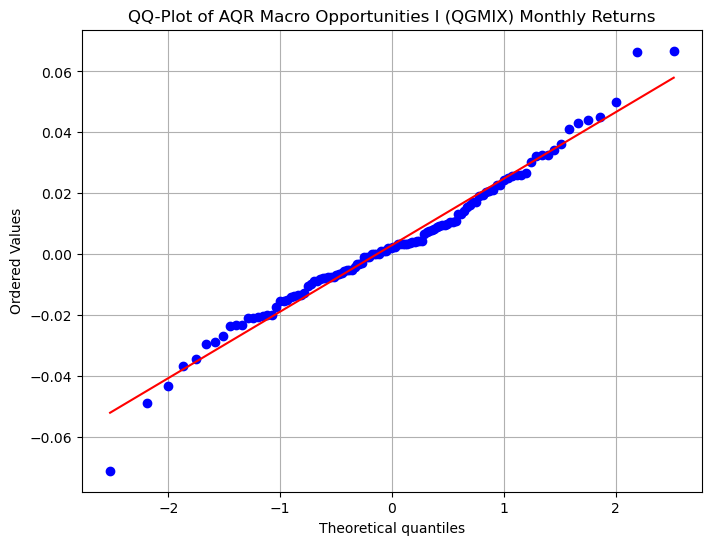

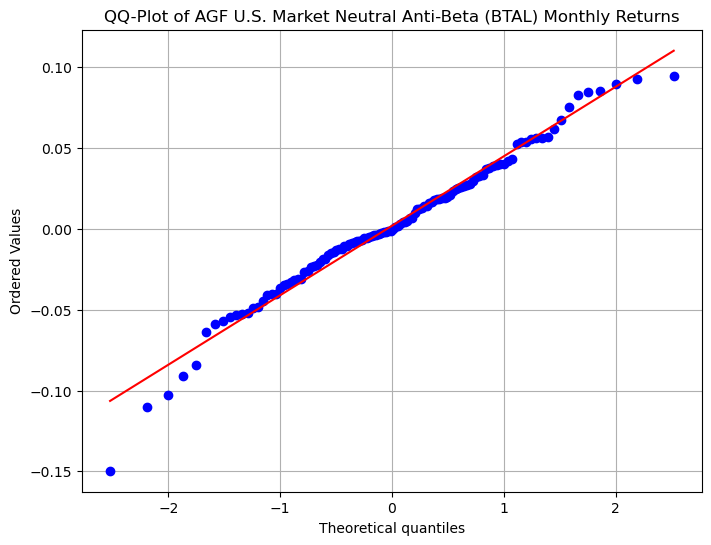

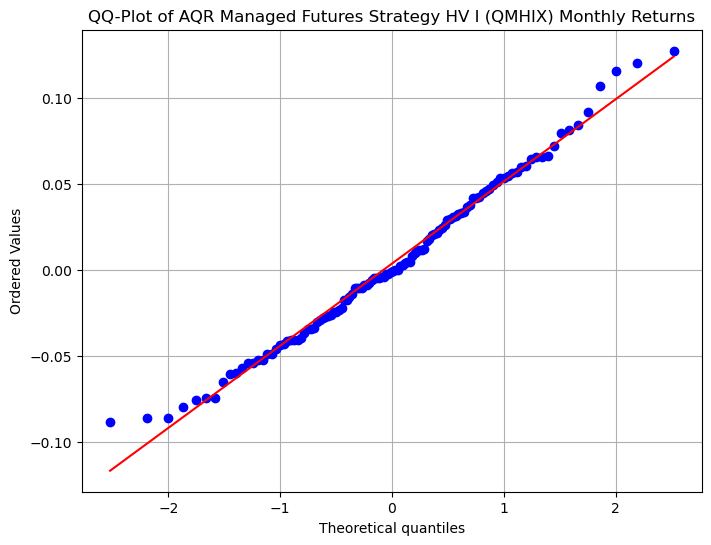

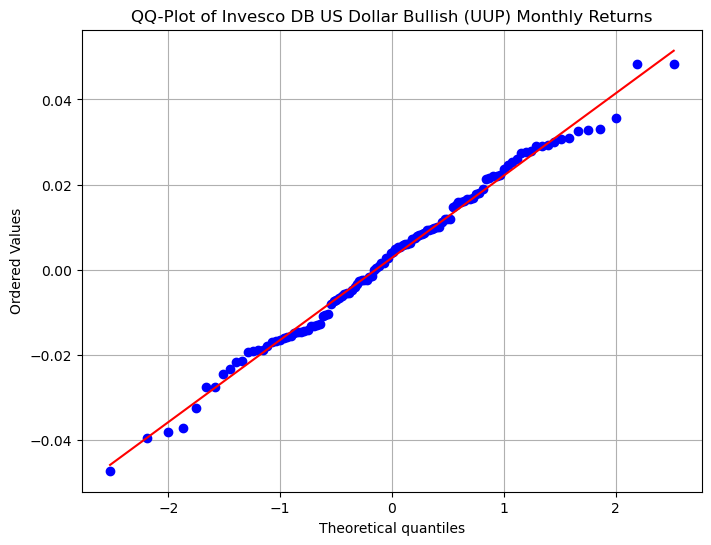

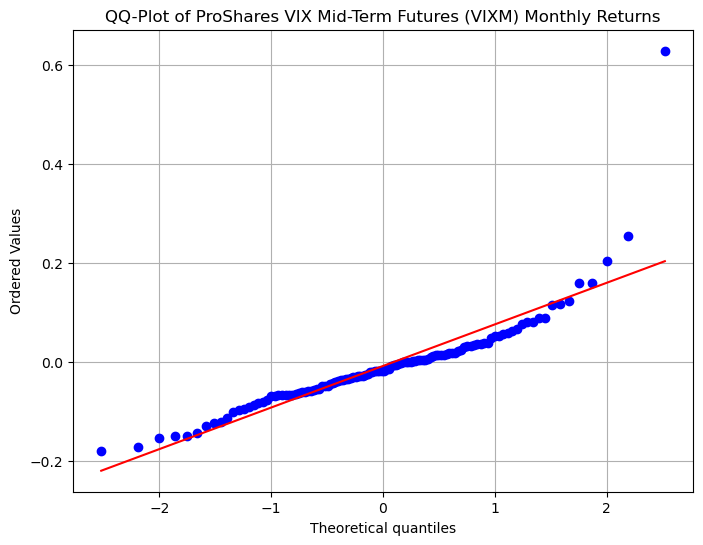

In [15]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Iterate over all assets excluding the 'Date' column
for asset in data.columns:
    if asset != 'Date':  # Skip the 'Date' column
        plt.figure(figsize=(8, 6))
        stats.probplot(data[asset], dist="norm", plot=plt)
        plt.title(f"QQ-Plot of {asset} Monthly Returns")
        plt.grid(True)
        plt.show()


In [18]:
import numpy as np
import pandas as pd
from scipy.stats import t, cauchy, norm, kstest

# Function to compute AIC and BIC
def calculate_aic_bic(log_likelihood, num_params, num_data_points):
    aic = 2 * num_params - 2 * log_likelihood
    bic = np.log(num_data_points) * num_params - 2 * log_likelihood
    return aic, bic

# Initialize results list
results_list = []

# Iterate over each asset (excluding 'Date')
for asset in data.columns:
    if asset != 'Date':  # Skip 'Date'
        returns = data[asset]
        n = len(returns)

        # Fit T-Distribution
        df_t, loc_t, scale_t = t.fit(returns)
        ll_t = np.sum(np.log(t.pdf(returns, df_t, loc_t, scale_t)))
        aic_t, bic_t = calculate_aic_bic(ll_t, 3, n)
        ks_t = kstest(returns, 't', args=(df_t, loc_t, scale_t))

        # Fit Cauchy Distribution
        loc_cauchy, scale_cauchy = cauchy.fit(returns)
        ll_cauchy = np.sum(np.log(cauchy.pdf(returns, loc_cauchy, scale_cauchy)))
        aic_cauchy, bic_cauchy = calculate_aic_bic(ll_cauchy, 2, n)
        ks_cauchy = kstest(returns, 'cauchy', args=(loc_cauchy, scale_cauchy))

        # Fit Normal Distribution
        mu_normal, std_normal = norm.fit(returns)
        ll_normal = np.sum(np.log(norm.pdf(returns, mu_normal, std_normal)))
        aic_normal, bic_normal = calculate_aic_bic(ll_normal, 2, n)
        ks_normal = kstest(returns, 'norm', args=(mu_normal, std_normal))

        # Collect results for this asset
        results_list.append({
            'Asset': asset,
            'AIC_T': aic_t,
            'AIC_Cauchy': aic_cauchy,
            'AIC_Normal': aic_normal,
            'BIC_T': bic_t,
            'BIC_Cauchy': bic_cauchy,
            'BIC_Normal': bic_normal,
            'K-S_T': ks_t.statistic,
            'K-S_Cauchy': ks_cauchy.statistic,
            'K-S_Normal': ks_normal.statistic
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results_list)

# Ensure the AIC columns are in the correct format
results_df[['AIC_T', 'AIC_Cauchy', 'AIC_Normal']] = results_df[['AIC_T', 'AIC_Cauchy', 'AIC_Normal']].astype(float)

# Function to highlight the best fit based on AIC, BIC, and K-S separately
def highlight_best_fit(row):
    aic_cols = ['AIC_T', 'AIC_Cauchy', 'AIC_Normal']
    bic_cols = ['BIC_T', 'BIC_Cauchy', 'BIC_Normal']
    ks_cols = ['K-S_T', 'K-S_Cauchy', 'K-S_Normal']

    min_aic = row[aic_cols].min()
    min_bic = row[bic_cols].min()
    min_ks = row[ks_cols].min()

    def highlight(val, col_type):
        if col_type == 'AIC' and val == min_aic:
            return 'background-color: lightgreen; font-weight: bold'
        elif col_type == 'BIC' and val == min_bic:
            return 'background-color: lightblue; font-weight: bold'
        elif col_type == 'K-S' and val == min_ks:
            return 'background-color: lightyellow; font-weight: bold'
        else:
            return ''

    return [
        highlight(val, 'AIC') if col in aic_cols else
        highlight(val, 'BIC') if col in bic_cols else
        highlight(val, 'K-S') if col in ks_cols else ''
        for col, val in row.items()
    ]

# Apply formatting to highlight the best fit for each metric group
formatted_results = results_df.style.apply(highlight_best_fit, axis=1)

# Add borders and background shading to separate the metric groups
formatted_results = formatted_results.set_table_styles(
    [{
        'selector': 'thead th',
        'props': [('border', '2px solid black')]
    }, {
        'selector': 'tbody td',
        'props': [('border', '1px solid black')]
    }, {
        'selector': 'td.col0',
        'props': 'background-color: #f4f4f4; font-weight: bold'
    }, {
        'selector': 'td:nth-child(3), td:nth-child(4), td:nth-child(5)',  # AIC columns
        'props': [('background-color', '#e6f7ff')]
    }, {
        'selector': 'td:nth-child(6), td:nth-child(7), td:nth-child(8)',  # BIC columns
        'props': [('background-color', '#fff3e6')]
    }, {
        'selector': 'td:nth-child(9), td:nth-child(10), td:nth-child(11)',  # K-S columns
        'props': [('background-color', '#e6ffe6')]
    }]
)

# Format all numeric columns to two decimal places
formatted_results = formatted_results.format({
    'AIC_T': '{:.2f}', 'AIC_Cauchy': '{:.2f}', 'AIC_Normal': '{:.2f}',
    'BIC_T': '{:.2f}', 'BIC_Cauchy': '{:.2f}', 'BIC_Normal': '{:.2f}',
    'K-S_T': '{:.2f}', 'K-S_Cauchy': '{:.2f}', 'K-S_Normal': '{:.2f}'
})

# Display the formatted table
formatted_results


In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize dictionary to hold the bootstrap results for each asset
bootstrap_results_dict = {}

# Number of bootstrap iterations
n_iterations = 1000

# Exclude the 'Date' column from the data
asset_columns = data.columns.drop('Date')

# Loop through each asset in the dataset (excluding the 'Date' column)
for asset in asset_columns:
    # Get the asset returns
    asset_returns = data[asset].dropna()
    n_size = len(asset_returns)

    # Arrays to hold bootstrap estimates
    bootstrap_means = np.zeros(n_iterations)
    bootstrap_vars = np.zeros(n_iterations)

    # Perform bootstrap resampling
    for i in range(n_iterations):
        # Generate a bootstrap sample with replacement
        bootstrap_sample = np.random.choice(asset_returns, size=n_size, replace=True)

        # Calculate mean and variance for the bootstrap sample
        bootstrap_means[i] = np.mean(bootstrap_sample)
        bootstrap_vars[i] = np.var(bootstrap_sample)

    # Calculate 95% confidence intervals
    mean_ci_lower, mean_ci_upper = np.percentile(bootstrap_means, [2.5, 97.5])
    var_ci_lower, var_ci_upper = np.percentile(bootstrap_vars, [2.5, 97.5])

    # Store the results in a dictionary
    bootstrap_results_dict[asset] = {
        "Mean Estimate": np.mean(bootstrap_means),
        "Mean 95% CI Lower": mean_ci_lower,
        "Mean 95% CI Upper": mean_ci_upper,
        "Variance Estimate": np.mean(bootstrap_vars),
        "Variance 95% CI Lower": var_ci_lower,
        "Variance 95% CI Upper": var_ci_upper
    }

# Convert the results to a DataFrame for better readability
bootstrap_results_df = pd.DataFrame(bootstrap_results_dict).T
bootstrap_results_df.columns = ["Mean Estimate", "Mean 95% CI Lower", "Mean 95% CI Upper",
                                "Variance Estimate", "Variance 95% CI Lower", "Variance 95% CI Upper"]

# Display the results in a nicely formatted table
bootstrap_results_df = bootstrap_results_df.style.format({
    "Mean Estimate": "{:.4f}",
    "Mean 95% CI Lower": "{:.4f}",
    "Mean 95% CI Upper": "{:.4f}",
    "Variance Estimate": "{:.6f}",
    "Variance 95% CI Lower": "{:.6f}",
    "Variance 95% CI Upper": "{:.6f}"
}).set_caption("Bootstrap Results for Asset Returns (Means and Variances)")

bootstrap_results_df


In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize dictionary to hold the bootstrap results for each asset
bootstrap_results_dict = {}

# Number of bootstrap iterations
n_iterations = 1000

# Exclude the 'Date' column from the data
asset_columns = data.columns.drop('Date')

# Determine the number of periods per year based on data frequency
# For example:
# If data is daily returns: periods_per_year = 252
# If data is weekly returns: periods_per_year = 52
# If data is monthly returns: periods_per_year = 12
periods_per_year = 12  # Adjust this value according to your data frequency

# Loop through each asset in the dataset (excluding the 'Date' column)
for asset in asset_columns:
    # Get the asset returns
    asset_returns = data[asset].dropna()
    n_size = len(asset_returns)

    # Arrays to hold bootstrap estimates
    bootstrap_means = np.zeros(n_iterations)
    bootstrap_vars = np.zeros(n_iterations)

    # Perform bootstrap resampling
    for i in range(n_iterations):
        # Generate a bootstrap sample with replacement
        bootstrap_sample = np.random.choice(asset_returns, size=n_size, replace=True)

        # Calculate mean and variance for the bootstrap sample
        bootstrap_means[i] = np.mean(bootstrap_sample)
        bootstrap_vars[i] = np.var(bootstrap_sample, ddof=1)

    # Annualize the bootstrap means and variances
    annualized_bootstrap_means = bootstrap_means * periods_per_year
    annualized_bootstrap_vars = bootstrap_vars * periods_per_year

    # Convert variances to standard deviations
    annualized_bootstrap_std_devs = np.sqrt(annualized_bootstrap_vars)

    # Calculate 95% confidence intervals for the annualized mean returns
    mean_ci_lower, mean_ci_upper = np.percentile(annualized_bootstrap_means, [2.5, 97.5])

    # Calculate 95% confidence intervals for the annualized standard deviations
    std_ci_lower, std_ci_upper = np.percentile(annualized_bootstrap_std_devs, [2.5, 97.5])

    # Store the results in a dictionary and multiply by 100 to convert to percentages
    bootstrap_results_dict[asset] = {
        "Annualized Mean Estimate": np.mean(annualized_bootstrap_means) * 100,
        "Mean 95% CI Lower": mean_ci_lower * 100,
        "Mean 95% CI Upper": mean_ci_upper * 100,
        "Annualized Std Dev Estimate": np.mean(annualized_bootstrap_std_devs) * 100,
        "Std Dev 95% CI Lower": std_ci_lower * 100,
        "Std Dev 95% CI Upper": std_ci_upper * 100
    }

# Convert the results to a DataFrame for better readability
bootstrap_results_df = pd.DataFrame(bootstrap_results_dict).T
bootstrap_results_df.columns = ["Annualized Mean Estimate", "Mean 95% CI Lower", "Mean 95% CI Upper",
                                "Annualized Std Dev Estimate", "Std Dev 95% CI Lower", "Std Dev 95% CI Upper"]

# Display the results in a nicely formatted table with percentage formatting (two decimal places)
bootstrap_results_df = bootstrap_results_df.style.format({
    "Annualized Mean Estimate": "{:.2f}%",
    "Mean 95% CI Lower": "{:.2f}%",
    "Mean 95% CI Upper": "{:.2f}%",
    "Annualized Std Dev Estimate": "{:.2f}%",
    "Std Dev 95% CI Lower": "{:.2f}%",
    "Std Dev 95% CI Upper": "{:.2f}%"
}).set_caption("Bootstrap Results for Annualized Asset Returns (Means and Standard Deviations in Percentages)")

bootstrap_results_df
bootstrap_results_df


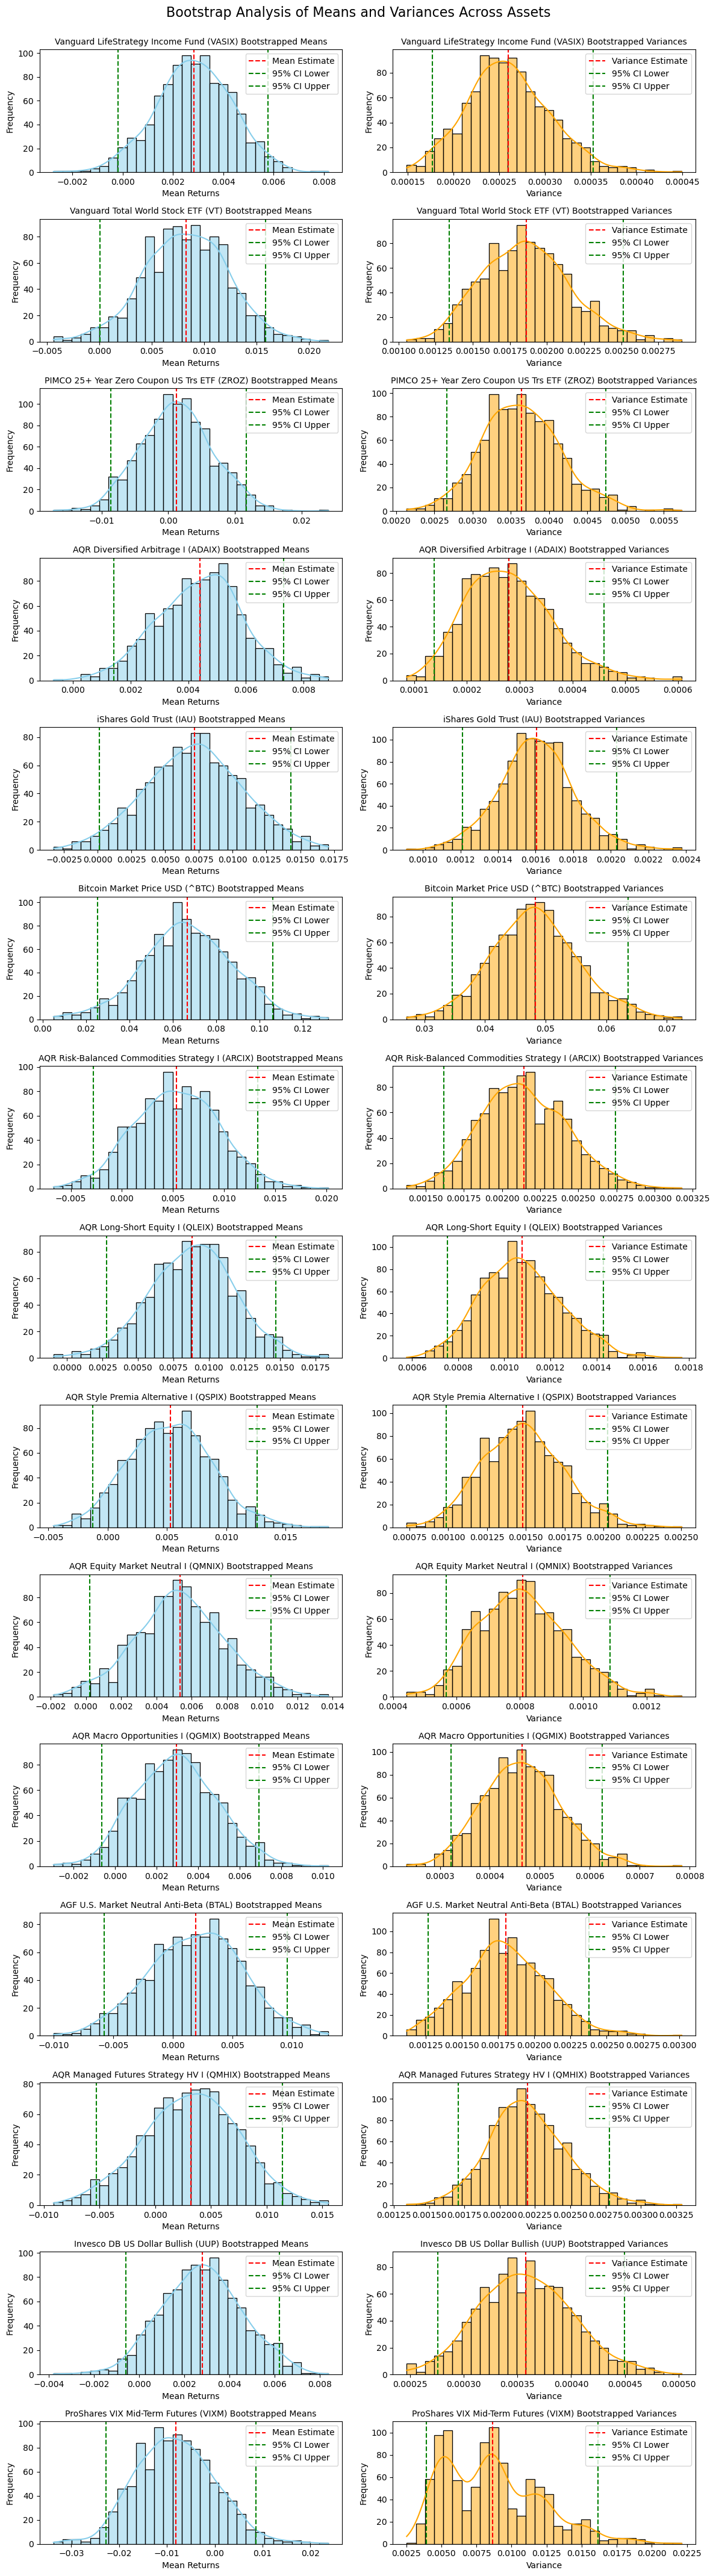

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Exclude the 'Date' column from the data
asset_columns = data.columns.drop('Date')

# Number of bootstrap iterations
n_iterations = 1000

# Determine how many assets to plot and set the layout
n_assets = len(asset_columns)
n_cols = 2  # Number of columns for subplot layout
n_rows = n_assets  # Two rows per asset (one for mean, one for variance)

# Dynamically set figure height to avoid crowding
fig_height = n_assets * 3  # Adjust the multiplier based on preference

# Create a figure and set the main title above all plots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, fig_height))

# Adjust the y-position of the title and the layout
fig.suptitle("Bootstrap Analysis of Means and Variances Across Assets", fontsize=16, y=0.95)

# Loop through each asset in the dataset (excluding the 'Date' column)
for idx, asset in enumerate(asset_columns):
    asset_returns = data[asset].dropna()
    n_size = len(asset_returns)

    # Arrays to hold bootstrap estimates
    bootstrap_means = np.zeros(n_iterations)
    bootstrap_vars = np.zeros(n_iterations)

    # Perform bootstrap resampling
    for i in range(n_iterations):
        bootstrap_sample = np.random.choice(asset_returns, size=n_size, replace=True)
        bootstrap_means[i] = np.mean(bootstrap_sample)
        bootstrap_vars[i] = np.var(bootstrap_sample)

    # Calculate 95% confidence intervals for mean and variance
    mean_ci_lower, mean_ci_upper = np.percentile(bootstrap_means, [2.5, 97.5])
    var_ci_lower, var_ci_upper = np.percentile(bootstrap_vars, [2.5, 97.5])

    # Plot bootstrapped means (left column)
    ax_means = axes[idx, 0]
    sns.histplot(bootstrap_means, bins=30, kde=True, color='skyblue', ax=ax_means)
    ax_means.axvline(np.mean(bootstrap_means), color='red', linestyle='--', label="Mean Estimate")
    ax_means.axvline(mean_ci_lower, color='green', linestyle='--', label="95% CI Lower")
    ax_means.axvline(mean_ci_upper, color='green', linestyle='--', label="95% CI Upper")
    ax_means.set_title(f"{asset} Bootstrapped Means", fontsize=10)
    ax_means.set_xlabel("Mean Returns")
    ax_means.set_ylabel("Frequency")
    ax_means.legend()

    # Plot bootstrapped variances (right column)
    ax_vars = axes[idx, 1]
    sns.histplot(bootstrap_vars, bins=30, kde=True, color='orange', ax=ax_vars)
    ax_vars.axvline(np.mean(bootstrap_vars), color='red', linestyle='--', label="Variance Estimate")
    ax_vars.axvline(var_ci_lower, color='green', linestyle='--', label="95% CI Lower")
    ax_vars.axvline(var_ci_upper, color='green', linestyle='--', label="95% CI Upper")
    ax_vars.set_title(f"{asset} Bootstrapped Variances", fontsize=10)
    ax_vars.set_xlabel("Variance")
    ax_vars.set_ylabel("Frequency")
    ax_vars.legend()

# Adjust the layout for better spacing
plt.subplots_adjust(hspace=0.4, wspace=0.3)  # More spacing between subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout, reserving space for the title
plt.show()

In [ ]:
# Reimport the necessary dataset and reprocess the VASIX returns for outlier detection
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset to ensure the environment is set up
file_path = 'Opportunity_Set.xlsx'
data = pd.read_excel(file_path)

# Let's proceed with outlier detection for VASIX using the following methods:
# - Z-scores to detect outliers more than 3 standard deviations from the mean
# - IQR method to detect outliers
# - Box plot to visualize outliers

# Step 1: Calculate Z-scores for VASIX returns
vasix_returns = data["Vanguard LifeStrategy Income Fund (VASIX)"]
mean_vasix = vasix_returns.mean()
std_vasix = vasix_returns.std()

# Z-scores (standardizing the returns)
z_scores = (vasix_returns - mean_vasix) / std_vasix

# Identify outliers with Z-score > 3 or < -3
z_outliers = vasix_returns[(z_scores > 3) | (z_scores < -3)]

# Step 2: IQR Method for outliers
Q1 = vasix_returns.quantile(0.25)
Q3 = vasix_returns.quantile(0.75)
IQR = Q3 - Q1
iqr_outliers = vasix_returns[(vasix_returns < (Q1 - 1.5 * IQR)) | (vasix_returns > (Q3 + 1.5 * IQR))]

# Step 3: Plot box plot to visualize the outliers
plt.figure(figsize=(8, 6))
sns.boxplot(vasix_returns, color='skyblue')
plt.title("Box Plot of VASIX Returns")
plt.xlabel("Monthly Returns")
plt.show()

# Display the identified outliers
outliers = {
    "Z-score Outliers": z_outliers,
    "IQR Outliers": iqr_outliers
}

outliers


In [ ]:
import scipy.stats as stats
import pandas as pd

# Define degrees of freedom for the T-distribution (based on previous fit)
df_t = 2.23  # Example from the previous T-distribution fit

# Function to calculate expected frequency based on a distribution's CDF
def calculate_expected_frequency(z_score, dist, df=None):
    if dist == 'normal':
        prob = 2 * (1 - stats.norm.cdf(abs(z_score)))  # Two-tailed probability for normal distribution
    elif dist == 't':
        prob = 2 * (1 - stats.t.cdf(abs(z_score), df=df))  # Two-tailed probability for T-distribution
    elif dist == 'cauchy':
        prob = 2 * (1 - stats.cauchy.cdf(abs(z_score)))  # Two-tailed probability for Cauchy distribution
    else:
        raise ValueError("Unsupported distribution")
    return prob

# Iterate through each asset
for asset in data.columns.drop('Date'):
    asset_returns = data[asset].dropna()

    # Step 1: Calculate Z-scores for each return (using normal distribution mean and std)
    z_scores = (asset_returns - asset_returns.mean()) / asset_returns.std()

    # Step 2: Identify the 5 highest and 5 lowest outlier returns
    iqr_outliers_with_scores = pd.DataFrame({
        "Return": asset_returns,
        "Z-Score": z_scores
    }).sort_values(by="Z-Score")

    # Select the 3 highest and 3 lowest Z-scores (outliers)
    top_outliers = pd.concat([iqr_outliers_with_scores.head(3), iqr_outliers_with_scores.tail(3)])

    # Step 3: Calculate expected frequencies for each distribution and empirical frequency
    outliers_with_frequencies = []

    for index, row in top_outliers.iterrows():
        z_score = row["Z-Score"]
        normal_freq = calculate_expected_frequency(z_score, 'normal') * 100  # Convert to percentage
        t_freq = calculate_expected_frequency(z_score, 't', df=df_t) * 100  # Convert to percentage
        cauchy_freq = calculate_expected_frequency(z_score, 'cauchy') * 100  # Convert to percentage

        # Empirical frequency calculation (<= for negative returns, >= for positive)
        if row["Return"] < 0:
            empirical_count = asset_returns[asset_returns <= row["Return"]].count()
        else:
            empirical_count = asset_returns[asset_returns >= row["Return"]].count()
        
        empirical_freq = (empirical_count / len(asset_returns)) * 100  # Convert to percentage

        outliers_with_frequencies.append({
            "Return (%)": row['Return'] * 100,  # Convert return to percentage without formatting
            "Z-Score": z_score,  # Keep Z-score raw for sorting
            "Normal Dist. Expected Freq (%)": normal_freq,
            "T-Dist. Expected Freq (%)": t_freq,
            "Cauchy Dist. Expected Freq (%)": cauchy_freq,
            "Adjusted Empirical Frequency (%)": empirical_freq
        })

    # Convert to DataFrame
    outliers_frequencies_df = pd.DataFrame(outliers_with_frequencies)

    # Sort by "Return (%)" in descending order
    sorted_outliers_frequencies_df = outliers_frequencies_df.sort_values(by="Return (%)", ascending=False)

    # Format the values after sorting
    sorted_outliers_frequencies_df = sorted_outliers_frequencies_df.style.format({
        "Return (%)": "{:.2f}",  # Format Return with 2 decimals
        "Z-Score": "{:.2f}",  # Format Z-Score with 2 decimals
        "Normal Dist. Expected Freq (%)": "{:.1f}",  # Format frequencies with 1 decimal
        "T-Dist. Expected Freq (%)": "{:.1f}",
        "Cauchy Dist. Expected Freq (%)": "{:.1f}",
        "Adjusted Empirical Frequency (%)": "{:.1f}"
    })

    # Display the outliers DataFrame
    print(f"Outliers for {asset}:")
    display(sorted_outliers_frequencies_df)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Check if 'Date' is already the index or if the column exists with a different name
if 'Date' in data.columns:
    data = data.set_index('Date')  # Set 'Date' as the index if it isn't already

# Function to plot rolling metrics for a single asset
def plot_rolling_metrics(asset_returns, asset_name, window_size=36):
    # Calculate rolling statistics
    rolling_mean_annualized = asset_returns.rolling(window=window_size).mean() * 12
    rolling_std_annualized = asset_returns.rolling(window=window_size).std() * (12 ** 0.5)
    rolling_sharpe_annualized = rolling_mean_annualized / rolling_std_annualized

    # Drop NaN values dynamically (where rolling data starts)
    rolling_mean_annualized = rolling_mean_annualized.dropna()
    rolling_std_annualized = rolling_std_annualized.dropna()
    rolling_sharpe_annualized = rolling_sharpe_annualized.dropna()

    # Create the plots
    plt.figure(figsize=(12, 8))

    # Plot rolling annualized mean
    plt.subplot(3, 1, 1)
    plt.plot(rolling_mean_annualized.index, rolling_mean_annualized, color='blue')
    plt.title(f"Annualized Rolling Mean for {asset_name} ({window_size}-Month Window)")
    plt.ylabel("Mean Return")

    # Plot rolling annualized standard deviation
    plt.subplot(3, 1, 2)
    plt.plot(rolling_std_annualized.index, rolling_std_annualized, color='green')
    plt.title(f"Annualized Rolling Standard Deviation for {asset_name} ({window_size}-Month Window)")
    plt.ylabel("Standard Deviation")

    # Plot rolling annualized Sharpe ratio
    plt.subplot(3, 1, 3)
    plt.plot(rolling_sharpe_annualized.index, rolling_sharpe_annualized, color='red')
    plt.title(f"Annualized Rolling Sharpe Ratio for {asset_name} ({window_size}-Month Window)")
    plt.ylabel("Sharpe Ratio")
    plt.xlabel("Date")

    # Apply layout adjustments
    plt.tight_layout()
    plt.show()

# Loop through each asset and generate plots
for asset in data.columns:  # Now, no need to drop 'Date' as it should be the index
    asset_returns = data[asset].dropna()  # Drop NaN values
    plot_rolling_metrics(asset_returns, asset)


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis, t

# Load the data
file_path = 'Opportunity_Set.xlsx'
data = pd.read_excel(file_path)

# Ensure the returns data has a DateTimeIndex
data['Date'] = pd.to_datetime(data['Date'])  # Convert 'Date' column to datetime
data.set_index('Date', inplace=True)  # Set 'Date' as the index

# Assuming 'vasix_returns' contains monthly return data for VASIX
vasix_returns = data["Vanguard LifeStrategy Income Fund (VASIX)"]

# 1. Compound Annual Growth Rate (CAGR)
def calculate_cagr(returns, periods_per_year):
    total_return = (1 + returns).prod()
    n_years = len(returns) / periods_per_year
    cagr = total_return ** (1 / n_years) - 1
    return cagr

# 2. Annualized Standard Deviation
def calculate_annualized_std(returns, periods_per_year):
    return returns.std() * np.sqrt(periods_per_year)

# 3. Best Year and Worst Year (Annual Returns)
def calculate_annual_returns(returns, periods_per_year):
    annual_returns = (1 + returns).resample('YE').prod() - 1  # Use 'YE' (Year End) instead of 'Y'
    best_year = annual_returns.max()
    worst_year = annual_returns.min()
    return best_year, worst_year

# 4. Maximum Drawdown
def calculate_max_drawdown(returns):
    cumulative_returns = (1 + returns).cumprod()
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    max_drawdown = drawdown.min()
    return max_drawdown

# 5. Sharpe Ratio (assumes risk-free rate = 0 for simplicity)
def calculate_sharpe_ratio(returns, risk_free_rate, periods_per_year):
    excess_returns = returns - (risk_free_rate / periods_per_year)
    annualized_sharpe = (excess_returns.mean() / excess_returns.std()) * np.sqrt(periods_per_year)
    return annualized_sharpe

# 6. Sortino Ratio (downside risk)
def calculate_sortino_ratio(returns, risk_free_rate, periods_per_year):
    excess_returns = returns - (risk_free_rate / periods_per_year)
    downside_returns = returns[returns < 0]
    downside_std = downside_returns.std() * np.sqrt(periods_per_year)
    sortino_ratio = (excess_returns.mean() / downside_std) * np.sqrt(periods_per_year)
    return sortino_ratio

# Calculate skewness and kurtosis
vasix_skew = skew(vasix_returns)
vasix_kurtosis = kurtosis(vasix_returns)

# Calculate the confidence interval for the mean
confidence_level = 0.95
degrees_freedom = len(vasix_returns) - 1
mean_return = vasix_returns.mean()
sem = vasix_returns.sem()  # Standard error of the mean
confidence_interval = t.interval(confidence_level, degrees_freedom, mean_return, sem)

# Assuming monthly data, so 12 periods per year
periods_per_year = 12
risk_free_rate = 0.02  # Assuming 2% risk-free rate for Sharpe and Sortino ratios

# Calculate the statistics
cagr = calculate_cagr(vasix_returns, periods_per_year)
annualized_std = calculate_annualized_std(vasix_returns, periods_per_year)
best_year, worst_year = calculate_annual_returns(vasix_returns, periods_per_year)
max_drawdown = calculate_max_drawdown(vasix_returns)
sharpe_ratio = calculate_sharpe_ratio(vasix_returns, risk_free_rate, periods_per_year)
sortino_ratio = calculate_sortino_ratio(vasix_returns, risk_free_rate, periods_per_year)

# Display the results in a readable format
results = pd.DataFrame({
    "CAGR": [f"{cagr:.2%}"],
    "Annualized Std Dev": [f"{annualized_std:.2%}"],
    "Best Year": [f"{best_year:.2%}"],
    "Worst Year": [f"{worst_year:.2%}"],
    "Max Drawdown": [f"{max_drawdown:.2%}"],
    "Sharpe Ratio": [round(sharpe_ratio, 2)],
    "Sortino Ratio": [round(sortino_ratio, 2)],
    "Skew": [round(vasix_skew, 2)],
    "Kurtosis": [round(vasix_kurtosis, 2)],
    "Confidence Interval of Mean": [f"({confidence_interval[0]:.2%}, {confidence_interval[1]:.2%})"]
})

results



In [ ]:
from scipy import stats

# Perform a one-sample t-test to test if the mean is different from zero
t_statistic, p_value = stats.ttest_1samp(vasix_returns, 0)

# Display the t-statistic and p-value
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("There is evidence to reject the null hypothesis. The mean return is statistically different from zero.")
else:
    print("There is not enough evidence to reject the null hypothesis. The mean return is not statistically different from zero.")


In [ ]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Create a dependent variable (VASIX returns)
y = vasix_returns

# Create an independent variable (VASIX returns)
X = vasix_returns

# Add a constant to the independent variable for the intercept
X = sm.add_constant(X)

# Perform the regression (OLS = Ordinary Least Squares)
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression
print(results.summary())


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('Opportunity_Set.csv')

# Isolate the VASIX returns
vasix_returns = df['Vanguard LifeStrategy Income Fund (VASIX)'].dropna()

# Perform non-parametric bootstrap
n_iterations = 1000  # Number of bootstrap samples
bootstrap_means = []
bootstrap_stds = []

# Resample the VASIX returns with replacement
for _ in range(n_iterations):
    bootstrap_sample = np.random.choice(vasix_returns, size=len(vasix_returns), replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))
    bootstrap_stds.append(np.std(bootstrap_sample))

# Visualize the bootstrap distribution of the mean
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_means, bins=30, kde=True, color='skyblue')
plt.title('Bootstrap Distribution of VASIX Mean Returns')
plt.xlabel('Mean Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Summary statistics of bootstrap samples
mean_of_means = np.mean(bootstrap_means)
std_of_means = np.std(bootstrap_means)

print(f"Mean of Bootstrap Means: {mean_of_means:.6f}")
print(f"Standard Deviation of Bootstrap Means: {std_of_means:.6f}")


In [ ]:
from scipy.stats import anderson, shapiro, normaltest, jarque_bera
import statsmodels.api as sm

# VASIX returns
vasix_returns = df['Vanguard LifeStrategy Income Fund (VASIX)'].dropna()

# Anderson-Darling Test
ad_test = anderson(vasix_returns, dist='norm')
print(f"Anderson-Darling Test: Statistic = {ad_test.statistic}, Critical Values = {ad_test.critical_values}")

# Shapiro-Wilk Test
shapiro_test = shapiro(vasix_returns)
print(f"Shapiro-Wilk Test: Statistic = {shapiro_test.statistic}, p-value = {shapiro_test.pvalue}")

# D'Agostino's K-squared Test (aka normaltest)
dagostino_test = normaltest(vasix_returns)
print(f"D'Agostino’s K-squared Test: Statistic = {dagostino_test.statistic}, p-value = {dagostino_test.pvalue}")

# Jarque-Bera Test
jb_test = jarque_bera(vasix_returns)
print(f"Jarque-Bera Test: Statistic = {jb_test.statistic}, p-value = {jb_test.pvalue}")


In [ ]:
def evaluate_distribution(ad_stat, ad_critical_values, sw_pvalue, dagostino_pvalue, jb_pvalue):
    """
    Function to evaluate which distribution is likely the best fit based on test results.
    
    Parameters:
    - ad_stat: Anderson-Darling test statistic
    - ad_critical_values: Anderson-Darling critical values
    - sw_pvalue: Shapiro-Wilk p-value
    - dagostino_pvalue: D'Agostino K-squared test p-value
    - jb_pvalue: Jarque-Bera test p-value
    
    Returns:
    - String indicating the likely best distribution match.
    """
    # Start by checking Anderson-Darling Test
    if ad_stat > ad_critical_values[2]:  # Using a common significance level threshold
        # Anderson-Darling rejects normality
        if sw_pvalue < 0.05 and dagostino_pvalue < 0.05 and jb_pvalue < 0.05:
            return "Likely a distribution with heavy tails or skewness (t-distribution, skew-normal)"
        elif jb_pvalue > 0.05:
            return "Data may have moderate skewness or kurtosis. Consider Skew-Normal distribution."
        else:
            return "Normal distribution may not be appropriate. Consider alternatives like t-distribution."
    else:
        # Anderson-Darling does not reject normality
        if sw_pvalue > 0.05 and dagostino_pvalue > 0.05 and jb_pvalue > 0.05:
            return "Normal distribution is a reasonable fit."
        else:
            return "Data has some deviation from normality, possibly mild skewness or kurtosis."

# Example usage with the test results you provided:
ad_stat = 2.1665157894061053
ad_critical_values = [0.558, 0.636, 0.763, 0.889, 1.058]
sw_pvalue = 0.0008143913345557641
dagostino_pvalue = 0.022621319632538953
jb_pvalue = 0.0027374377398421104

# Evaluate the distribution
distribution_suggestion = evaluate_distribution(ad_stat, ad_critical_values, sw_pvalue, dagostino_pvalue, jb_pvalue)
print(f"Suggested distribution: {distribution_suggestion}")


In [ ]:
from scipy.stats import anderson, shapiro, normaltest, jarque_bera

def evaluate_distribution(ad_stat, ad_critical_values, sw_pvalue, dagostino_pvalue, jb_pvalue):
    """
    Function to evaluate which distribution is likely the best fit based on test results.
    
    Parameters:
    - ad_stat: Anderson-Darling test statistic
    - ad_critical_values: Anderson-Darling critical values
    - sw_pvalue: Shapiro-Wilk p-value
    - dagostino_pvalue: D'Agostino K-squared test p-value
    - jb_pvalue: Jarque-Bera test p-value
    
    Returns:
    - String indicating the likely best distribution match.
    """
    # Start by checking Anderson-Darling Test
    if ad_stat > ad_critical_values[2]:  # Using a common significance level threshold
        # Anderson-Darling rejects normality
        if sw_pvalue < 0.05 and dagostino_pvalue < 0.05 and jb_pvalue < 0.05:
            return "Likely a distribution with heavy tails or skewness (t-distribution, skew-normal)"
        elif jb_pvalue > 0.05:
            return "Data may have moderate skewness or kurtosis. Consider Skew-Normal distribution."
        else:
            return "Normal distribution may not be appropriate. Consider alternatives like t-distribution."
    else:
        # Anderson-Darling does not reject normality
        if sw_pvalue > 0.05 and dagostino_pvalue > 0.05 and jb_pvalue > 0.05:
            return "Normal distribution is a reasonable fit."
        else:
            return "Data has some deviation from normality, possibly mild skewness or kurtosis."

# VASIX returns
vasix_returns = df['Vanguard LifeStrategy Income Fund (VASIX)'].dropna()

# Anderson-Darling Test
ad_test = anderson(vasix_returns, dist='norm')
ad_stat = ad_test.statistic
ad_critical_values = ad_test.critical_values
print(f"Anderson-Darling Test: Statistic = {ad_stat}, Critical Values = {ad_critical_values}")

# Shapiro-Wilk Test
shapiro_test = shapiro(vasix_returns)
sw_stat = shapiro_test.statistic
sw_pvalue = shapiro_test.pvalue
print(f"Shapiro-Wilk Test: Statistic = {sw_stat}, p-value = {sw_pvalue}")

# D'Agostino's K-squared Test (aka normaltest)
dagostino_test = normaltest(vasix_returns)
dagostino_stat = dagostino_test.statistic
dagostino_pvalue = dagostino_test.pvalue
print(f"D'Agostino’s K-squared Test: Statistic = {dagostino_stat}, p-value = {dagostino_pvalue}")

# Jarque-Bera Test
jb_test = jarque_bera(vasix_returns)
jb_stat = jb_test.statistic
jb_pvalue = jb_test.pvalue
print(f"Jarque-Bera Test: Statistic = {jb_stat}, p-value = {jb_pvalue}")

# Evaluate the distribution based on test results
distribution_suggestion = evaluate_distribution(ad_stat, ad_critical_values, sw_pvalue, dagostino_pvalue, jb_pvalue)
print(f"Suggested distribution: {distribution_suggestion}")
